## Importing Libraries

In [766]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Importing Dataset

In [767]:
HouseHoldmasterdetail = pd.read_excel(r"C:\Users\dell\Desktop\New Hire Assessment Programming Problem\HouseHoldmasterdetail.xlsx")
HouseholIndividualDetails = pd.read_excel(r"C:\Users\dell\Desktop\New Hire Assessment Programming Problem\HouseholIndividualDetails.xlsx")
Viewership_data_day1 = pd.read_excel(r"C:\Users\dell\Desktop\New Hire Assessment Programming Problem\Viewership data day1.xlsx")
Viewership_data_day2 = pd.read_excel(r"C:\Users\dell\Desktop\New Hire Assessment Programming Problem\Viewership data day2.xlsx")
Viewership_data_day3 = pd.read_excel(r"C:\Users\dell\Desktop\New Hire Assessment Programming Problem\Viewership data day3.xlsx")

### HouseHoldmasterdetail

In [768]:
HouseHoldmasterdetail

,HH ID,Cities,Blocks
0,5070,Auckland,2
1,5076,New York,19
2,5123,New York,23
3,5142,Dallas,4
4,5143,Dallas,23
...,...,...,...
164,9881,San Franisco,13
165,9898,Auckland,13
166,9950,Dallas,13
167,9952,NewPort,13


In [769]:
HouseHoldmasterdetail.shape

(169, 3)

In [770]:
HouseHoldmasterdetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HH ID   169 non-null    int64 
 1   Cities  169 non-null    object
 2   Blocks  169 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


In [771]:
HouseHoldmasterdetail.nunique()

HH ID     169
Cities      5
Blocks     15
dtype: int64

In [772]:
a=HouseHoldmasterdetail["Cities"].value_counts()
a

New York        68
Dallas          48
Auckland        19
San Franisco    17
NewPort         17
Name: Cities, dtype: int64

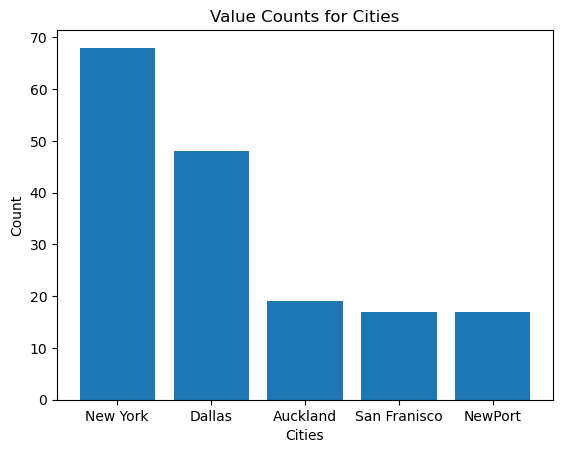

In [773]:
# Plot a bar chart of the value counts
plt.bar(a.index, a.values)

# Add labels and title to the chart
plt.xlabel('Cities')
plt.ylabel('Count')
plt.title('Value Counts for Cities')

# Show the chart
plt.show()

In [774]:
b=HouseHoldmasterdetail["Blocks"].value_counts()
b

13    32
2     24
4     21
12    21
23    14
9     13
20    11
3      8
19     6
18     6
5      6
21     3
8      2
16     1
15     1
Name: Blocks, dtype: int64

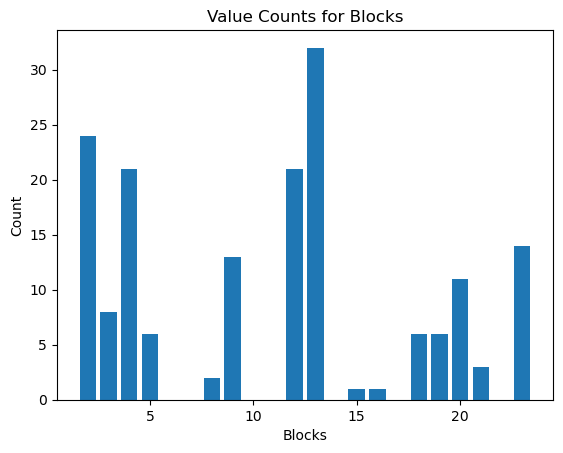

In [775]:
# Plot a bar chart of the value counts
plt.bar(b.index, b.values)

# Add labels and title to the chart
plt.xlabel('Blocks')
plt.ylabel('Count')
plt.title('Value Counts for Blocks')

# Show the chart
plt.show()

In [776]:
HouseHoldmasterdetail.isnull().sum()
#No missing value

HH ID     0
Cities    0
Blocks    0
dtype: int64

In [777]:
HouseHoldmasterdetail.nunique()

HH ID     169
Cities      5
Blocks     15
dtype: int64

### HouseholIndividualDetails

In [778]:
HouseholIndividualDetails

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Sex,Education
0,6283,4,4844.772198,50,M,SSC
1,6283,1,6637.126847,42,F,SSC
2,6283,5,9989.732835,17,M,SSC
3,6658,2,9875.840557,58,M,Graduate
4,6658,3,9432.010587,49,F,SSC
...,...,...,...,...,...,...
520,5143,3,9608.890364,53,F,HSC
521,5143,4,7195.189063,36,M,HSC
522,5143,5,9218.902004,32,M,PG
523,5153,2,7346.853146,52,F,SSC


In [779]:
HouseholIndividualDetails.describe()

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years
count,525.000000,525.000000,525.000000,525.000000
mean,7478.087619,3.005714,5035.849263,39.091429
std,1481.409890,1.414877,2985.155222,17.905478
min,5070.000000,1.000000,6.907993,3.000000
25%,6169.000000,2.000000,2334.532515,24.000000
50%,7375.000000,3.000000,5041.881930,41.000000
75%,8806.000000,4.000000,7623.115878,52.000000
max,9957.000000,5.000000,9989.732835,90.000000


In [780]:
HouseholIndividualDetails.nunique()

HH               169
INDIVIDUAL_ID      5
WEIGHT           525
Age_in_years      77
Sex                2
Education          4
dtype: int64

In [781]:
HouseholIndividualDetails.isnull().sum()

HH               0
INDIVIDUAL_ID    0
WEIGHT           0
Age_in_years     0
Sex              0
Education        0
dtype: int64

In [782]:
bb=HouseholIndividualDetails["Sex"].value_counts()
bb

M    282
F    243
Name: Sex, dtype: int64

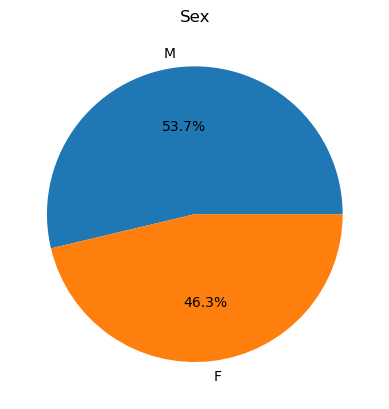

In [783]:
# Create a pie chart of the value counts
plt.pie(bb.values, labels=bb.index, autopct='%1.1f%%')

# Add title to the chart
plt.title('Sex')

# Show the chart
plt.show()

In [784]:
c=HouseholIndividualDetails["Education"].value_counts()
c

SSC         243
HSC         237
Graduate     24
PG           21
Name: Education, dtype: int64

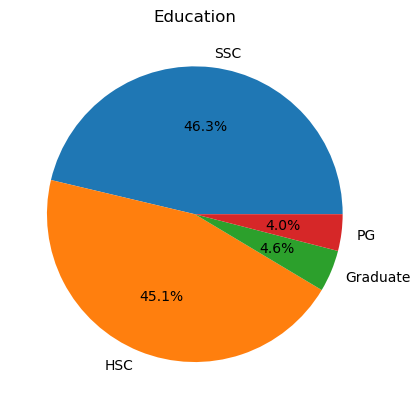

In [785]:
# Create a pie chart of the value counts
plt.pie(c.values, labels=c.index, autopct='%1.1f%%')

# Add title to the chart
plt.title('Education')

# Show the chart
plt.show()

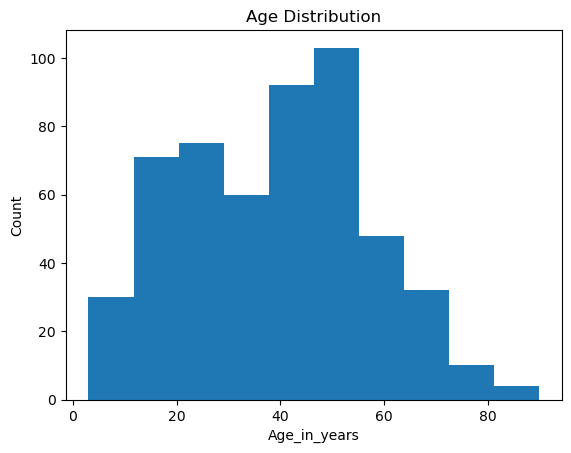

In [786]:
# Create a histogram of age
plt.hist(HouseholIndividualDetails['Age_in_years'], bins=10)

# Add labels and title to the chart
plt.xlabel('Age_in_years')
plt.ylabel('Count')
plt.title('Age Distribution')

# Show the chart
plt.show()

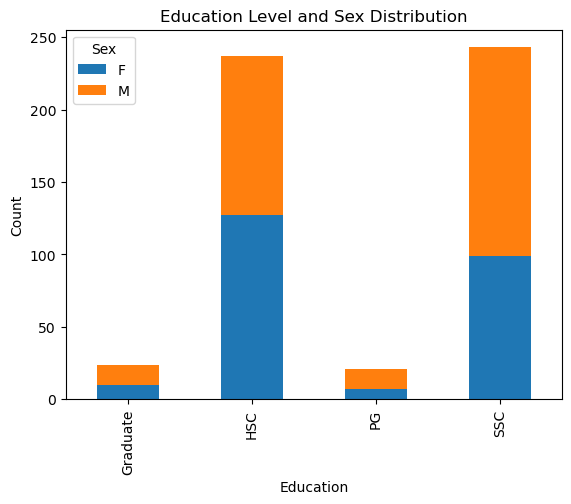

In [787]:
# Group the data by education and sex
data = HouseholIndividualDetails.groupby(['Education', 'Sex']).size().unstack()

# Create a stacked bar chart
data.plot(kind='bar', stacked=True)

# Add labels and title to the chart
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Level and Sex Distribution')

# Show the chart
plt.show()

### Viewership data 

In [788]:
Viewership_data_day1

,Date,HH,INDIVIDUAL_ID,Duration in minutes,Channels
0,2022-12-01,6283,4,66,CH3
1,2022-12-01,6283,1,61,CH5
2,2022-12-01,6283,4,1,CH1
3,2022-12-01,6283,5,97,Ch2
4,2022-12-01,6658,2,38,Ch2
...,...,...,...,...,...
796,2022-12-01,5153,2,84,CH5
797,2022-12-01,5153,2,35,CH5
798,2022-12-01,5153,2,95,CH5
799,2022-12-01,5153,2,27,Ch2


In [789]:
Viewership_data_day1.describe()

,HH,INDIVIDUAL_ID,Duration in minutes
count,801.000000,801.000000,801.000000
mean,7545.253433,3.009988,50.991261
std,1492.663860,1.399071,28.745455
min,5070.000000,1.000000,1.000000
25%,6216.000000,2.000000,26.000000
50%,7463.000000,3.000000,52.000000
75%,8936.000000,4.000000,76.000000
max,9957.000000,5.000000,100.000000


In [790]:
Viewership_data_day1.nunique()

Date                     1
HH                     169
INDIVIDUAL_ID            5
Duration in minutes    100
Channels                 5
dtype: int64

In [791]:
Viewership_data_day1.isnull().sum()

Date                   0
HH                     0
INDIVIDUAL_ID          0
Duration in minutes    0
Channels               0
dtype: int64

In [792]:
Viewership_data_day2

,Date,HH,INDIVIDUAL_ID,Duration in minutes,Channels
0,2022-12-02,6283,4,7,CH4
1,2022-12-02,6283,1,97,CH1
2,2022-12-02,6283,4,99,CH1
3,2022-12-02,6283,5,69,Ch2
4,2022-12-02,6658,2,18,CH1
...,...,...,...,...,...
796,2022-12-02,5153,2,86,CH4
797,2022-12-02,5153,2,75,CH1
798,2022-12-02,5153,2,53,CH5
799,2022-12-02,5153,2,87,Ch2


In [793]:
Viewership_data_day2.describe()

,HH,INDIVIDUAL_ID,Duration in minutes
count,801.000000,801.000000,801.000000
mean,7545.253433,3.009988,51.141074
std,1492.663860,1.399071,29.120505
min,5070.000000,1.000000,1.000000
25%,6216.000000,2.000000,26.000000
50%,7463.000000,3.000000,49.000000
75%,8936.000000,4.000000,77.000000
max,9957.000000,5.000000,100.000000


In [794]:
Viewership_data_day2.nunique()

Date                     1
HH                     169
INDIVIDUAL_ID            5
Duration in minutes    100
Channels                 5
dtype: int64

In [795]:
Viewership_data_day2.isnull().sum()

Date                   0
HH                     0
INDIVIDUAL_ID          0
Duration in minutes    0
Channels               0
dtype: int64

In [796]:
Viewership_data_day3

,Date,HH,INDIVIDUAL_ID,Duration in minutes,Channels
0,2022-12-03,6283,4,54,CH5
1,2022-12-03,6283,1,95,CH1
2,2022-12-03,6283,4,21,CH3
3,2022-12-03,6283,5,67,Ch2
4,2022-12-03,6658,2,48,CH4
...,...,...,...,...,...
796,2022-12-03,5153,2,71,CH5
797,2022-12-03,5153,2,54,CH5
798,2022-12-03,5153,2,34,CH3
799,2022-12-03,5153,2,53,Ch2


In [797]:
Viewership_data_day3.describe()

,HH,INDIVIDUAL_ID,Duration in minutes
count,801.000000,801.000000,801.000000
mean,7545.253433,3.009988,50.609238
std,1492.663860,1.399071,29.372919
min,5070.000000,1.000000,1.000000
25%,6216.000000,2.000000,24.000000
50%,7463.000000,3.000000,51.000000
75%,8936.000000,4.000000,78.000000
max,9957.000000,5.000000,100.000000


In [798]:
Viewership_data_day3.nunique()

Date                     1
HH                     169
INDIVIDUAL_ID            5
Duration in minutes    100
Channels                 5
dtype: int64

In [799]:
Viewership_data_day3.isnull().sum()

Date                   0
HH                     0
INDIVIDUAL_ID          0
Duration in minutes    0
Channels               0
dtype: int64

### Combining Data

In [800]:
# HouseholIndividualDetails and HouseHoldmasterdetail combine and make full information of # Househol

data= pd.merge(HouseholIndividualDetails,HouseHoldmasterdetail,left_on="HH",right_on="HH ID")

In [801]:
data

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Sex,Education,HH ID,Cities,Blocks
0,6283,4,4844.772198,50,M,SSC,6283,Dallas,4
1,6283,1,6637.126847,42,F,SSC,6283,Dallas,4
2,6283,5,9989.732835,17,M,SSC,6283,Dallas,4
3,6658,2,9875.840557,58,M,Graduate,6658,Dallas,4
4,6658,3,9432.010587,49,F,SSC,6658,Dallas,4
...,...,...,...,...,...,...,...,...,...
520,5143,3,9608.890364,53,F,HSC,5143,Dallas,23
521,5143,4,7195.189063,36,M,HSC,5143,Dallas,23
522,5143,5,9218.902004,32,M,PG,5143,Dallas,23
523,5153,2,7346.853146,52,F,SSC,5153,Auckland,13


In [802]:
# dataframe informations
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 524
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HH             525 non-null    int64  
 1   INDIVIDUAL_ID  525 non-null    int64  
 2   WEIGHT         525 non-null    float64
 3   Age_in_years   525 non-null    int64  
 4   Sex            525 non-null    object 
 5   Education      525 non-null    object 
 6   HH ID          525 non-null    int64  
 7   Cities         525 non-null    object 
 8   Blocks         525 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 41.0+ KB


In [803]:
data.describe()

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,HH ID,Blocks
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,7478.087619,3.005714,5035.849263,39.091429,7478.087619,10.986667
std,1481.409890,1.414877,2985.155222,17.905478,1481.409890,6.846310
min,5070.000000,1.000000,6.907993,3.000000,5070.000000,2.000000
25%,6169.000000,2.000000,2334.532515,24.000000,6169.000000,4.000000
50%,7375.000000,3.000000,5041.881930,41.000000,7375.000000,12.000000
75%,8806.000000,4.000000,7623.115878,52.000000,8806.000000,15.000000
max,9957.000000,5.000000,9989.732835,90.000000,9957.000000,23.000000


In [804]:
data.nunique()

HH               169
INDIVIDUAL_ID      5
WEIGHT           525
Age_in_years      77
Sex                2
Education          4
HH ID            169
Cities             5
Blocks            15
dtype: int64

In [805]:
data.isnull().sum()

HH               0
INDIVIDUAL_ID    0
WEIGHT           0
Age_in_years     0
Sex              0
Education        0
HH ID            0
Cities           0
Blocks           0
dtype: int64

In [806]:
data.duplicated().sum()

0

### We taken sample from 525 individual but in Viewership_data there are 801 records present.
### This indicates that there are some individual who saw more than one channel

### So now we make one record for one individual

### Viewership_data

In [987]:
# create dummy variables for categorical variables
one_hot_encoded_data1 = pd.get_dummies(Viewership_data_day1, columns=['Channels'])
one_hot_encoded_data1

,Date,HH,INDIVIDUAL_ID,Duration in minutes,Channels_CH1,Channels_CH3,Channels_CH4,Channels_CH5,Channels_Ch2
0,2022-12-01,6283,4,66,0,1,0,0,0
1,2022-12-01,6283,1,61,0,0,0,1,0
2,2022-12-01,6283,4,1,1,0,0,0,0
3,2022-12-01,6283,5,97,0,0,0,0,1
4,2022-12-01,6658,2,38,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
796,2022-12-01,5153,2,84,0,0,0,1,0
797,2022-12-01,5153,2,35,0,0,0,1,0
798,2022-12-01,5153,2,95,0,0,0,1,0
799,2022-12-01,5153,2,27,0,0,0,0,1


In [808]:
# Group the data by 'HH', 'INDIVIDUAL_ID' and 'Channels', and aggregate the 'Duration in minutes' column
grouped11 = one_hot_encoded_data1.groupby(['HH', 'INDIVIDUAL_ID','Channels_CH1','Channels_CH3',
                'Channels_CH4', 'Channels_CH5', 'Channels_Ch2']).agg({'Duration in minutes': 'sum', 'Channels_CH1':'sum',
       'Channels_CH3':'sum', 'Channels_CH4':'sum', 'Channels_CH5':'sum', 'Channels_Ch2':'sum'})

# Rename the aggregated columns
grouped11 = grouped11.rename(columns={'Duration in minutes': 'Total Duration','Channels_CH1':"CH_1",
       'Channels_CH3':"CH_3", 'Channels_CH4':"CH_4", 'Channels_CH5':"CH_5", 'Channels_Ch2':"CH_2"})

# Reset the index to turn the grouped columns into regular columns
grouped11 = grouped11.reset_index()
grouped11

,HH,INDIVIDUAL_ID,Channels_CH1,Channels_CH3,Channels_CH4,Channels_CH5,Channels_Ch2,Total Duration,CH_1,CH_3,CH_4,CH_5,CH_2
0,5070,1,0,1,0,0,0,57,0,1,0,0,0
1,5070,3,0,0,0,1,0,48,0,0,0,1,0
2,5070,3,1,0,0,0,0,31,1,0,0,0,0
3,5070,4,0,1,0,0,0,54,0,1,0,0,0
4,5076,3,0,0,1,0,0,89,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,9957,2,0,0,1,0,0,53,0,0,1,0,0
729,9957,3,0,0,0,0,1,29,0,0,0,0,1
730,9957,3,0,0,1,0,0,37,0,0,1,0,0
731,9957,3,1,0,0,0,0,90,1,0,0,0,0


In [809]:
# Group the data by 'HH', 'INDIVIDUAL_ID' and aggregate the 'Duration in minutes' column
grouped1 = grouped11.groupby(['HH', 'INDIVIDUAL_ID']).agg({'Total Duration': 'sum', 'CH_1':'sum',
       'CH_3':'sum', 'CH_4':'sum', 'CH_5':'sum', 'CH_2':'sum'})

# Rename the aggregated columns 
grouped1 = grouped1.rename(columns={'Total Duration': 'Duration in minutes',"CH_1":'CH1',
       "CH_3":'CH3', "CH_4":'CH4', "CH_5":'CH5', "CH_2":'CH2'})

# Reset the index to turn the grouped columns into regular columns
grouped1 = grouped1.reset_index()
grouped1

,HH,INDIVIDUAL_ID,Duration in minutes,CH1,CH3,CH4,CH5,CH2
0,5070,1,57,0,1,0,0,0
1,5070,3,79,1,0,0,1,0
2,5070,4,54,0,1,0,0,0
3,5076,3,89,0,0,1,0,0
4,5076,4,6,0,0,0,1,0
...,...,...,...,...,...,...,...,...
520,9952,5,134,2,0,0,0,1
521,9957,1,66,0,0,0,1,0
522,9957,2,53,0,0,1,0,0
523,9957,3,156,1,0,1,0,1


In [810]:
df1=pd.merge(data,grouped1,on=["HH","INDIVIDUAL_ID"])

In [811]:
df1

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Sex,Education,HH ID,Cities,Blocks,Duration in minutes,CH1,CH3,CH4,CH5,CH2
0,6283,4,4844.772198,50,M,SSC,6283,Dallas,4,67,1,1,0,0,0
1,6283,1,6637.126847,42,F,SSC,6283,Dallas,4,61,0,0,0,1,0
2,6283,5,9989.732835,17,M,SSC,6283,Dallas,4,97,0,0,0,0,1
3,6658,2,9875.840557,58,M,Graduate,6658,Dallas,4,132,0,0,0,0,2
4,6658,3,9432.010587,49,F,SSC,6658,Dallas,4,65,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,5143,3,9608.890364,53,F,HSC,5143,Dallas,23,62,1,0,0,0,0
521,5143,4,7195.189063,36,M,HSC,5143,Dallas,23,43,1,0,0,0,0
522,5143,5,9218.902004,32,M,PG,5143,Dallas,23,78,0,1,0,0,0
523,5153,2,7346.853146,52,F,SSC,5153,Auckland,13,241,0,0,0,3,1


In [812]:
df1.describe()

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,HH ID,Blocks,Duration in minutes,CH1,CH3,CH4,CH5,CH2
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,7478.087619,3.005714,5035.849263,39.091429,7478.087619,10.986667,77.798095,0.325714,0.308571,0.304762,0.318095,0.268571
std,1481.409890,1.414877,2985.155222,17.905478,1481.409890,6.846310,51.803663,0.537351,0.482541,0.511766,0.541904,0.515284
min,5070.000000,1.000000,6.907993,3.000000,5070.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6169.000000,2.000000,2334.532515,24.000000,6169.000000,4.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7375.000000,3.000000,5041.881930,41.000000,7375.000000,12.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8806.000000,4.000000,7623.115878,52.000000,8806.000000,15.000000,101.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,9957.000000,5.000000,9989.732835,90.000000,9957.000000,23.000000,273.000000,3.000000,2.000000,3.000000,3.000000,3.000000


In [813]:
df1.nunique()

HH                     169
INDIVIDUAL_ID            5
WEIGHT                 525
Age_in_years            77
Sex                      2
Education                4
HH ID                  169
Cities                   5
Blocks                  15
Duration in minutes    175
CH1                      4
CH3                      3
CH4                      4
CH5                      4
CH2                      4
dtype: int64

In [814]:

dfg=df1.groupby(['Sex'])['Duration in minutes'].mean().reset_index()
dfg

,Sex,Duration in minutes
0,F,76.942387
1,M,78.535461


In [815]:
dfg=df1.groupby(['Education'])['Duration in minutes'].mean().reset_index()
dfg

,Education,Duration in minutes
0,Graduate,68.000000
1,HSC,79.894515
2,PG,89.000000
3,SSC,75.753086


In [816]:
dfg=df1.groupby(['Cities'])['Duration in minutes'].mean().reset_index()
dfg

,Cities,Duration in minutes
0,Auckland,73.921875
1,Dallas,75.866197
2,New York,81.427885
3,NewPort,68.508772
4,San Franisco,83.296296


In [817]:
dfg=df1.groupby(['Blocks'])['Duration in minutes'].mean().reset_index()
dfg

,Blocks,Duration in minutes
0,2,79.129870
1,3,91.615385
2,4,79.952381
3,5,80.400000
4,8,94.200000
5,9,75.789474
6,12,78.338235
7,13,77.643564
8,15,85.000000
9,16,74.500000


In [818]:
dfg=Viewership_data_day1.groupby(['Channels'])['Duration in minutes'].mean().reset_index
dfg

<bound method Series.reset_index of Channels
CH1    48.894737
CH3    51.740741
CH4    52.406250
CH5    50.796407
Ch2    51.297872
Name: Duration in minutes, dtype: float64>

In [819]:
# Group the data by sex, education, and city and calculate the average duration in minutes
dfg=df1.groupby(['Sex', 'Education', 'Cities'])['Duration in minutes'].mean().reset_index()
dfg

,Sex,Education,Cities,Duration in minutes
0,F,Graduate,Auckland,51.000000
1,F,Graduate,Dallas,34.000000
2,F,Graduate,New York,94.600000
3,F,Graduate,NewPort,31.000000
4,F,Graduate,San Franisco,17.000000
5,F,HSC,Auckland,68.200000
6,F,HSC,Dallas,64.064516
7,F,HSC,New York,81.821429
8,F,HSC,NewPort,63.823529
9,F,HSC,San Franisco,88.153846


<AxesSubplot:xlabel='Sex', ylabel='Duration in minutes'>

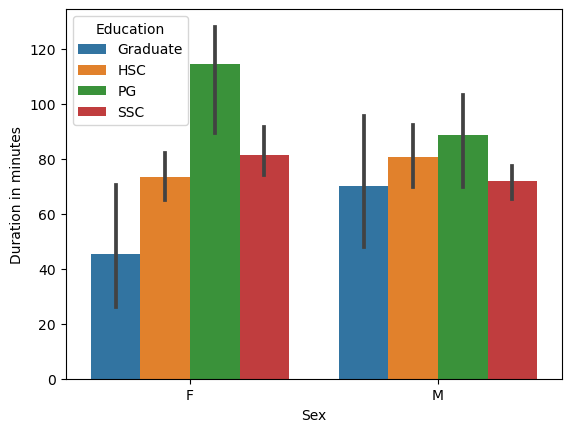

In [820]:
# Create a bar plot using seaborn
sns.barplot(x='Sex', y='Duration in minutes', hue='Education', data=dfg)

In [821]:
# create dummy variables for categorical variables
one_hot_encoded_data2 = pd.get_dummies(Viewership_data_day2, columns=['Channels'])
one_hot_encoded_data2.head()

# Group the data by 'HH', 'INDIVIDUAL_ID' and 'Channels', and aggregate the 'Duration in minutes' column
grouped22 = one_hot_encoded_data2.groupby(['HH', 'INDIVIDUAL_ID','Channels_CH1','Channels_CH3',
                'Channels_CH4', 'Channels_CH5', 'Channels_Ch2']).agg({'Duration in minutes': 'sum', 'Channels_CH1':'sum',
       'Channels_CH3':'sum', 'Channels_CH4':'sum', 'Channels_CH5':'sum', 'Channels_Ch2':'sum'})

# Rename the aggregated columns
grouped22 = grouped22.rename(columns={'Duration in minutes': 'Total Duration','Channels_CH1':"CH_1",
       'Channels_CH3':"CH_3", 'Channels_CH4':"CH_4", 'Channels_CH5':"CH_5", 'Channels_Ch2':"CH_2"})

# Reset the index to turn the grouped columns into regular columns
grouped22 = grouped22.reset_index()
grouped22

# Group the data by 'HH', 'INDIVIDUAL_ID' and aggregate the 'Duration in minutes' column
grouped2 = grouped22.groupby(['HH', 'INDIVIDUAL_ID']).agg({'Total Duration': 'sum', 'CH_1':'sum',
       'CH_3':'sum', 'CH_4':'sum', 'CH_5':'sum', 'CH_2':'sum'})

# Rename the aggregated columns 
grouped2 = grouped2.rename(columns={'Total Duration': 'Duration in minutes',"CH_1":'CH1',
       "CH_3":'CH3', "CH_4":'CH4', "CH_5":'CH5', "CH_2":'CH2'})

# Reset the index to turn the grouped columns into regular columns
grouped2 = grouped2.reset_index()
grouped2

df2=pd.merge(data,grouped2,on=["HH","INDIVIDUAL_ID"])
df2

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Sex,Education,HH ID,Cities,Blocks,Duration in minutes,CH1,CH3,CH4,CH5,CH2
0,6283,4,4844.772198,50,M,SSC,6283,Dallas,4,106,1,0,1,0,0
1,6283,1,6637.126847,42,F,SSC,6283,Dallas,4,97,1,0,0,0,0
2,6283,5,9989.732835,17,M,SSC,6283,Dallas,4,69,0,0,0,0,1
3,6658,2,9875.840557,58,M,Graduate,6658,Dallas,4,68,1,0,1,0,0
4,6658,3,9432.010587,49,F,SSC,6658,Dallas,4,68,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,5143,3,9608.890364,53,F,HSC,5143,Dallas,23,83,0,0,1,0,0
521,5143,4,7195.189063,36,M,HSC,5143,Dallas,23,90,0,1,0,0,0
522,5143,5,9218.902004,32,M,PG,5143,Dallas,23,72,1,0,0,0,0
523,5153,2,7346.853146,52,F,SSC,5153,Auckland,13,301,1,0,1,1,1


In [822]:
df2.describe()

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,HH ID,Blocks,Duration in minutes,CH1,CH3,CH4,CH5,CH2
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,7478.087619,3.005714,5035.849263,39.091429,7478.087619,10.986667,78.026667,0.310476,0.320000,0.289524,0.348571,0.257143
std,1481.409890,1.414877,2985.155222,17.905478,1481.409890,6.846310,52.565692,0.528559,0.498548,0.486443,0.554667,0.487018
min,5070.000000,1.000000,6.907993,3.000000,5070.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6169.000000,2.000000,2334.532515,24.000000,6169.000000,4.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7375.000000,3.000000,5041.881930,41.000000,7375.000000,12.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8806.000000,4.000000,7623.115878,52.000000,8806.000000,15.000000,104.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,9957.000000,5.000000,9989.732835,90.000000,9957.000000,23.000000,307.000000,2.000000,2.000000,3.000000,3.000000,3.000000


In [823]:
df2.nunique()

HH                     169
INDIVIDUAL_ID            5
WEIGHT                 525
Age_in_years            77
Sex                      2
Education                4
HH ID                  169
Cities                   5
Blocks                  15
Duration in minutes    179
CH1                      3
CH3                      3
CH4                      4
CH5                      4
CH2                      4
dtype: int64

In [824]:
dfg=df2.groupby(['Sex'])['Duration in minutes'].mean().reset_index()
dfg

,Sex,Duration in minutes
0,F,78.757202
1,M,77.397163


In [825]:
dfg=df2.groupby(['Education'])['Duration in minutes'].mean().reset_index()
dfg

,Education,Duration in minutes
0,Graduate,75.583333
1,HSC,78.185654
2,PG,85.190476
3,SSC,77.493827


In [826]:
dfg=df2.groupby(['Cities'])['Duration in minutes'].mean().reset_index()
dfg

,Cities,Duration in minutes
0,Auckland,72.046875
1,Dallas,76.394366
2,New York,78.879808
3,NewPort,79.438596
4,San Franisco,84.629630


In [827]:
dfg=df2.groupby(['Blocks'])['Duration in minutes'].mean().reset_index()
dfg

,Blocks,Duration in minutes
0,2,79.519481
1,3,74.615385
2,4,77.301587
3,5,77.800000
4,8,87.000000
5,9,71.868421
6,12,78.205882
7,13,80.712871
8,15,82.000000
9,16,81.000000


In [828]:
dfg=Viewership_data_day2.groupby(['Channels'])['Duration in minutes'].mean().reset_index()
dfg

,Channels,Duration in minutes
0,CH1,50.233129
1,CH3,49.898810
2,CH4,48.434211
3,CH5,50.918033
4,Ch2,57.133333


In [829]:
dfg=df2.groupby(['Sex', 'Education', 'Cities'])['Duration in minutes'].mean().reset_index()
dfg

,Sex,Education,Cities,Duration in minutes
0,F,Graduate,Auckland,80.000000
1,F,Graduate,Dallas,97.000000
2,F,Graduate,New York,64.600000
3,F,Graduate,NewPort,95.000000
4,F,Graduate,San Franisco,99.000000
5,F,HSC,Auckland,55.300000
6,F,HSC,Dallas,67.580645
7,F,HSC,New York,84.375000
8,F,HSC,NewPort,72.941176
9,F,HSC,San Franisco,99.923077


<AxesSubplot:xlabel='Sex', ylabel='Duration in minutes'>

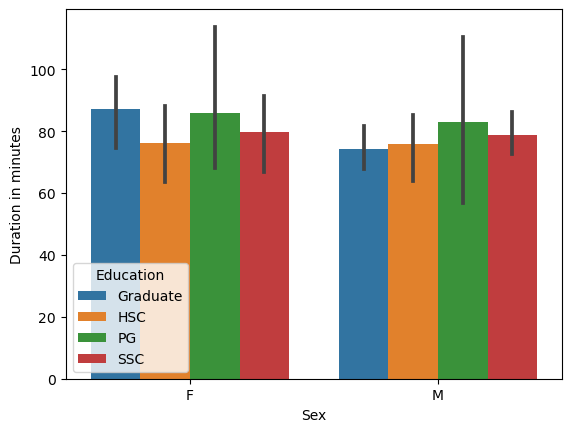

In [830]:
sns.barplot(x='Sex', y='Duration in minutes', hue='Education', data=dfg)

In [831]:
# create dummy variables for categorical variables
one_hot_encoded_data3 = pd.get_dummies(Viewership_data_day3, columns=['Channels'])
one_hot_encoded_data3.head()

# Group the data by 'HH', 'INDIVIDUAL_ID' and 'Channels', and aggregate the 'Duration in minutes' column
grouped33 = one_hot_encoded_data3.groupby(['HH', 'INDIVIDUAL_ID','Channels_CH1','Channels_CH3',
                'Channels_CH4', 'Channels_CH5', 'Channels_Ch2']).agg({'Duration in minutes': 'sum', 'Channels_CH1':'sum',
       'Channels_CH3':'sum', 'Channels_CH4':'sum', 'Channels_CH5':'sum', 'Channels_Ch2':'sum'})

# Rename the aggregated columns
grouped33 = grouped33.rename(columns={'Duration in minutes': 'Total Duration','Channels_CH1':"CH_1",
       'Channels_CH3':"CH_3", 'Channels_CH4':"CH_4", 'Channels_CH5':"CH_5", 'Channels_Ch2':"CH_2"})

# Reset the index to turn the grouped columns into regular columns
grouped33 = grouped33.reset_index()
grouped33

# Group the data by 'HH', 'INDIVIDUAL_ID' and aggregate the 'Duration in minutes' column
grouped3 = grouped33.groupby(['HH', 'INDIVIDUAL_ID']).agg({'Total Duration': 'sum', 'CH_1':'sum',
       'CH_3':'sum', 'CH_4':'sum', 'CH_5':'sum', 'CH_2':'sum'})

# Rename the aggregated columns 
grouped3 = grouped3.rename(columns={'Total Duration': 'Duration in minutes',"CH_1":'CH1',
       "CH_3":'CH3', "CH_4":'CH4', "CH_5":'CH5', "CH_2":'CH2'})

# Reset the index to turn the grouped columns into regular columns
grouped3 = grouped3.reset_index()
grouped3

df3=pd.merge(data,grouped3,on=["HH","INDIVIDUAL_ID"])
df3

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Sex,Education,HH ID,Cities,Blocks,Duration in minutes,CH1,CH3,CH4,CH5,CH2
0,6283,4,4844.772198,50,M,SSC,6283,Dallas,4,75,0,1,0,1,0
1,6283,1,6637.126847,42,F,SSC,6283,Dallas,4,95,1,0,0,0,0
2,6283,5,9989.732835,17,M,SSC,6283,Dallas,4,67,0,0,0,0,1
3,6658,2,9875.840557,58,M,Graduate,6658,Dallas,4,80,0,0,1,1,0
4,6658,3,9432.010587,49,F,SSC,6658,Dallas,4,94,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,5143,3,9608.890364,53,F,HSC,5143,Dallas,23,92,0,1,0,0,0
521,5143,4,7195.189063,36,M,HSC,5143,Dallas,23,18,0,1,0,0,0
522,5143,5,9218.902004,32,M,PG,5143,Dallas,23,5,0,1,0,0,0
523,5153,2,7346.853146,52,F,SSC,5153,Auckland,13,212,0,1,0,2,1


In [832]:
df3.describe()

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,HH ID,Blocks,Duration in minutes,CH1,CH3,CH4,CH5,CH2
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,7478.087619,3.005714,5035.849263,39.091429,7478.087619,10.986667,77.215238,0.308571,0.299048,0.274286,0.335238,0.308571
std,1481.409890,1.414877,2985.155222,17.905478,1481.409890,6.846310,53.646402,0.531474,0.509545,0.502860,0.547371,0.520590
min,5070.000000,1.000000,6.907993,3.000000,5070.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6169.000000,2.000000,2334.532515,24.000000,6169.000000,4.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7375.000000,3.000000,5041.881930,41.000000,7375.000000,12.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8806.000000,4.000000,7623.115878,52.000000,8806.000000,15.000000,98.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,9957.000000,5.000000,9989.732835,90.000000,9957.000000,23.000000,287.000000,3.000000,3.000000,2.000000,2.000000,2.000000


In [833]:
df3.nunique()

HH                     169
INDIVIDUAL_ID            5
WEIGHT                 525
Age_in_years            77
Sex                      2
Education                4
HH ID                  169
Cities                   5
Blocks                  15
Duration in minutes    180
CH1                      4
CH3                      4
CH4                      3
CH5                      3
CH2                      3
dtype: int64

In [834]:
dfg=df3.groupby(['Sex'])['Duration in minutes'].mean().reset_index()
dfg

,Sex,Duration in minutes
0,F,77.189300
1,M,77.237589


In [835]:
dfg=df3.groupby(['Education'])['Duration in minutes'].mean().reset_index()
dfg

,Education,Duration in minutes
0,Graduate,69.208333
1,HSC,78.746835
2,PG,74.571429
3,SSC,76.740741


In [836]:
dfg=df3.groupby(['Cities'])['Duration in minutes'].mean().reset_index()
dfg

,Cities,Duration in minutes
0,Auckland,69.031250
1,Dallas,72.950704
2,New York,82.822115
3,NewPort,71.035088
4,San Franisco,83.055556


In [837]:
dfg=df3.groupby(['Blocks'])['Duration in minutes'].mean().reset_index()
dfg

,Blocks,Duration in minutes
0,2,83.233766
1,3,79.923077
2,4,73.777778
3,5,81.533333
4,8,102.400000
5,9,77.500000
6,12,83.338235
7,13,71.386139
8,15,92.250000
9,16,104.500000


In [838]:
dfg=Viewership_data_day3.groupby(['Channels'])['Duration in minutes'].mean().reset_index()
dfg

,Channels,Duration in minutes
0,CH1,46.870370
1,CH3,50.038217
2,CH4,52.659722
3,CH5,51.829545
4,Ch2,51.753086


In [839]:
dfg=df3.groupby(['Sex', 'Education', 'Cities'])['Duration in minutes'].mean().reset_index()
dfg

,Sex,Education,Cities,Duration in minutes
0,F,Graduate,Auckland,22.000000
1,F,Graduate,Dallas,88.000000
2,F,Graduate,New York,81.800000
3,F,Graduate,NewPort,92.000000
4,F,Graduate,San Franisco,23.000000
5,F,HSC,Auckland,46.700000
6,F,HSC,Dallas,65.032258
7,F,HSC,New York,86.196429
8,F,HSC,NewPort,68.294118
9,F,HSC,San Franisco,105.461538


<AxesSubplot:xlabel='Sex', ylabel='Duration in minutes'>

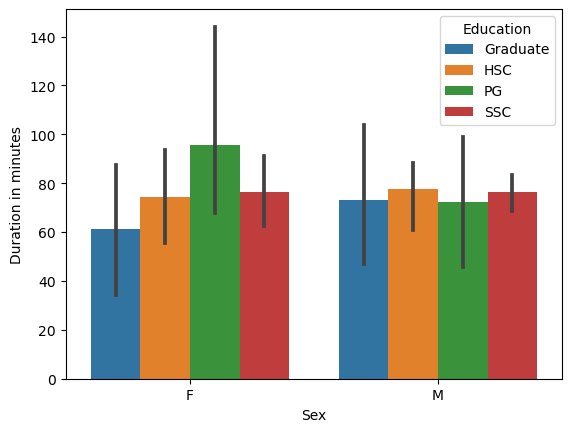

In [840]:
sns.barplot(x='Sex', y='Duration in minutes', hue='Education', data=dfg)

In [841]:
dd=pd.concat([df1,df2,df3],axis=0)
dd

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Sex,Education,HH ID,Cities,Blocks,Duration in minutes,CH1,CH3,CH4,CH5,CH2
0,6283,4,4844.772198,50,M,SSC,6283,Dallas,4,67,1,1,0,0,0
1,6283,1,6637.126847,42,F,SSC,6283,Dallas,4,61,0,0,0,1,0
2,6283,5,9989.732835,17,M,SSC,6283,Dallas,4,97,0,0,0,0,1
3,6658,2,9875.840557,58,M,Graduate,6658,Dallas,4,132,0,0,0,0,2
4,6658,3,9432.010587,49,F,SSC,6658,Dallas,4,65,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,5143,3,9608.890364,53,F,HSC,5143,Dallas,23,92,0,1,0,0,0
521,5143,4,7195.189063,36,M,HSC,5143,Dallas,23,18,0,1,0,0,0
522,5143,5,9218.902004,32,M,PG,5143,Dallas,23,5,0,1,0,0,0
523,5153,2,7346.853146,52,F,SSC,5153,Auckland,13,212,0,1,0,2,1


In [842]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575 entries, 0 to 524
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HH                   1575 non-null   int64  
 1   INDIVIDUAL_ID        1575 non-null   int64  
 2   WEIGHT               1575 non-null   float64
 3   Age_in_years         1575 non-null   int64  
 4   Sex                  1575 non-null   object 
 5   Education            1575 non-null   object 
 6   HH ID                1575 non-null   int64  
 7   Cities               1575 non-null   object 
 8   Blocks               1575 non-null   int64  
 9   Duration in minutes  1575 non-null   int64  
 10  CH1                  1575 non-null   uint8  
 11  CH3                  1575 non-null   uint8  
 12  CH4                  1575 non-null   uint8  
 13  CH5                  1575 non-null   uint8  
 14  CH2                  1575 non-null   uint8  
dtypes: float64(1), int64(6), object(3), uin

In [843]:
dd.drop(["HH ID"],axis=1,inplace=True)

In [844]:
dd.isnull().sum()

HH                     0
INDIVIDUAL_ID          0
WEIGHT                 0
Age_in_years           0
Sex                    0
Education              0
Cities                 0
Blocks                 0
Duration in minutes    0
CH1                    0
CH3                    0
CH4                    0
CH5                    0
CH2                    0
dtype: int64

In [845]:
dd.describe()

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Blocks,Duration in minutes,CH1,CH3,CH4,CH5,CH2
count,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000
mean,7478.087619,3.005714,5035.849263,39.091429,10.986667,77.680000,0.314921,0.309206,0.289524,0.333968,0.278095
std,1480.468416,1.413977,2983.258078,17.894098,6.841959,52.644976,0.532191,0.496760,0.500303,0.547800,0.508001
min,5070.000000,1.000000,6.907993,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6169.000000,2.000000,2334.532515,24.000000,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7375.000000,3.000000,5041.881930,41.000000,12.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8806.000000,4.000000,7623.115878,52.000000,15.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9957.000000,5.000000,9989.732835,90.000000,23.000000,307.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [846]:
dd.nunique()

HH                     169
INDIVIDUAL_ID            5
WEIGHT                 525
Age_in_years            77
Sex                      2
Education                4
Cities                   5
Blocks                  15
Duration in minutes    227
CH1                      4
CH3                      4
CH4                      4
CH5                      4
CH2                      4
dtype: int64

In [847]:
dd.duplicated().sum()

1

In [848]:
dd.drop_duplicates(inplace=True)

In [849]:
dd.duplicated().sum()

0

In [850]:
dfg=dd.groupby(['Sex'])['Duration in minutes'].mean().reset_index()
dfg

,Sex,Duration in minutes
0,F,77.712912
1,M,77.723404


In [851]:
dfg=dd.groupby(['Education'])['Duration in minutes'].mean().reset_index()
dfg

,Education,Duration in minutes
0,Graduate,70.930556
1,HSC,79.029577
2,PG,82.920635
3,SSC,76.662551


In [852]:
dfg=dd.groupby(['Cities'])['Duration in minutes'].mean().reset_index()
dfg

,Cities,Duration in minutes
0,Auckland,71.666667
1,Dallas,75.070423
2,New York,81.146067
3,NewPort,72.994152
4,San Franisco,83.660494


In [853]:
dfg=dd.groupby(['Blocks'])['Duration in minutes'].mean().reset_index()
dfg

,Blocks,Duration in minutes
0,2,80.627706
1,3,82.051282
2,4,77.010582
3,5,79.911111
4,8,94.533333
5,9,75.052632
6,12,79.960784
7,13,76.580858
8,15,86.416667
9,16,86.666667


In [854]:
dfg=dd.groupby(['Sex', 'Education', 'Cities'])['Duration in minutes'].mean().reset_index()
dfg

,Sex,Education,Cities,Duration in minutes
0,F,Graduate,Auckland,51.000000
1,F,Graduate,Dallas,73.000000
2,F,Graduate,New York,80.333333
3,F,Graduate,NewPort,72.666667
4,F,Graduate,San Franisco,46.333333
5,F,HSC,Auckland,56.733333
6,F,HSC,Dallas,65.559140
7,F,HSC,New York,84.532934
8,F,HSC,NewPort,68.352941
9,F,HSC,San Franisco,97.846154


<AxesSubplot:xlabel='Sex', ylabel='Duration in minutes'>

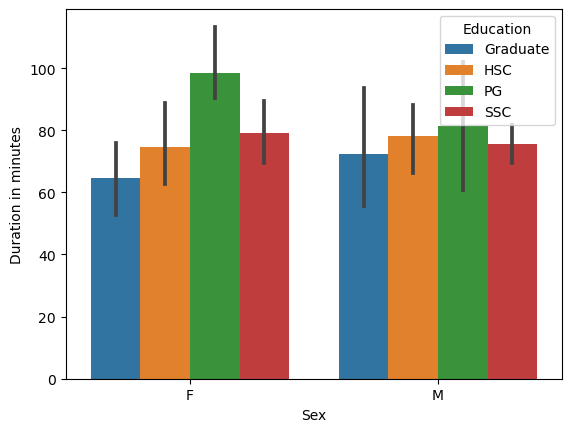

In [855]:
sns.barplot(x='Sex', y='Duration in minutes', hue='Education', data=dfg)

In [856]:
corr=dd.corr()
corr

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Blocks,Duration in minutes,CH1,CH3,CH4,CH5,CH2
HH,1.000000,0.002834,-0.080451,-0.015166,-0.070539,0.035464,-0.004599,0.011769,0.047275,0.037782,0.042558
INDIVIDUAL_ID,0.002834,1.000000,0.038904,-0.001282,0.030996,-0.026562,-0.030811,0.010497,0.046568,-0.031752,0.018534
WEIGHT,-0.080451,0.038904,1.000000,-0.013212,0.031213,0.035149,-0.021407,-0.005057,-0.047501,0.027738,0.062666
Age_in_years,-0.015166,-0.001282,-0.013212,1.000000,0.050210,0.215574,0.063344,0.080361,0.084540,0.148536,0.100082
Blocks,-0.070539,0.030996,0.031213,0.050210,1.000000,-0.039349,-0.042026,0.014261,-0.032411,-0.043796,0.029494
Duration in minutes,0.035464,-0.026562,0.035149,0.215574,-0.039349,1.000000,0.209200,0.184053,0.211232,0.250260,0.264524
CH1,-0.004599,-0.030811,-0.021407,0.063344,-0.042026,0.209200,1.000000,-0.145338,-0.123378,-0.153592,-0.148133
CH3,0.011769,0.010497,-0.005057,0.080361,0.014261,0.184053,-0.145338,1.000000,-0.110171,-0.159872,-0.127212
CH4,0.047275,0.046568,-0.047501,0.084540,-0.032411,0.211232,-0.123378,-0.110171,1.000000,-0.164907,-0.157246
CH5,0.037782,-0.031752,0.027738,0.148536,-0.043796,0.250260,-0.153592,-0.159872,-0.164907,1.000000,-0.103006


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


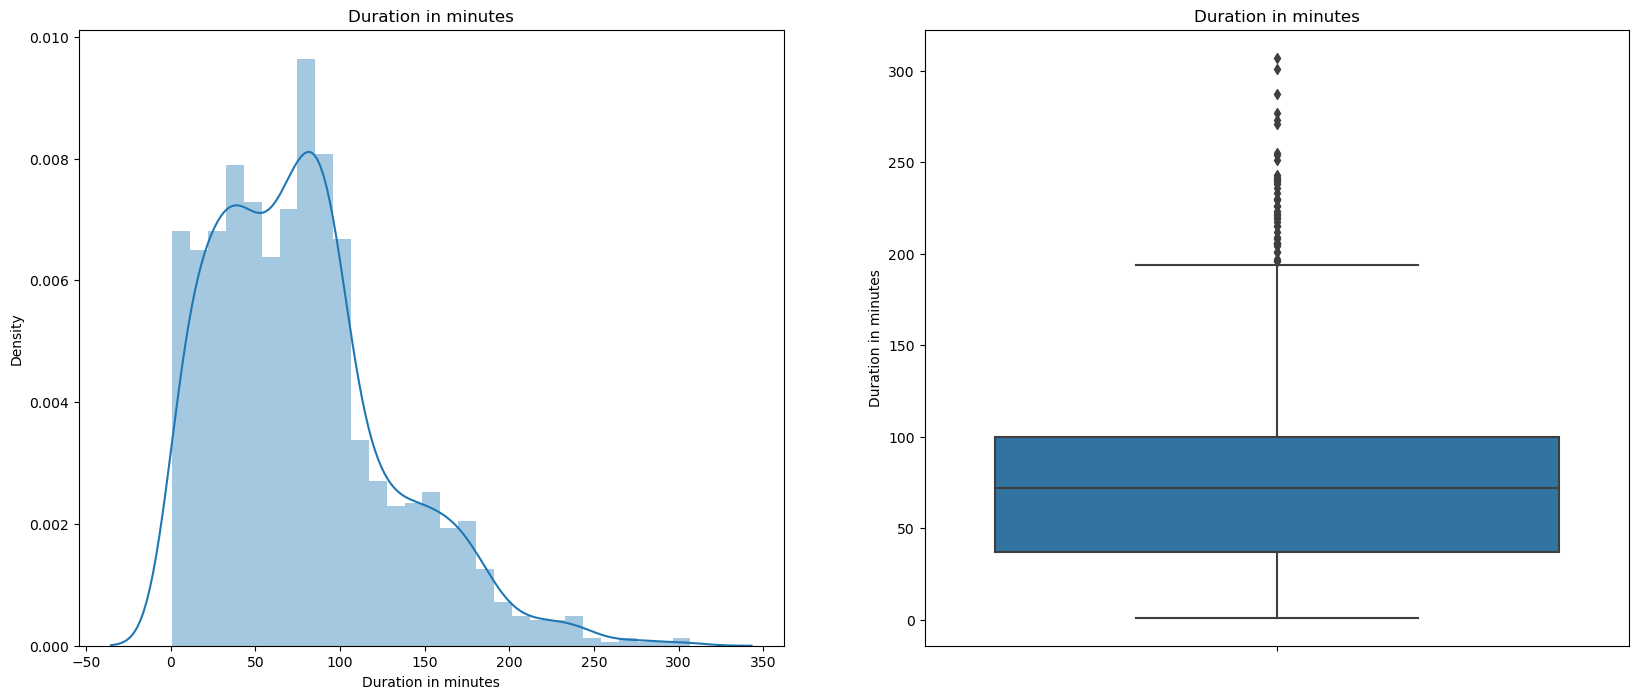

In [857]:
# Let's get some information about our target feature
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Duration in minutes')
sns.distplot(dd['Duration in minutes'])

plt.subplot(1,2,2)
plt.title('Duration in minutes')
sns.boxplot(y=dd['Duration in minutes'])

plt.show()

In [858]:
# Calculate the quartiles and IQR
Q1 = np.percentile(dd["Duration in minutes"], 25)
Q3 = np.percentile(dd["Duration in minutes"], 75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = dd[(dd["Duration in minutes"] < lower_bound) | (dd["Duration in minutes"] > upper_bound)]
outliers
# # # Remove the outliers from the data
# # clean_data = dd[(dd["Duration in minutes"] >= lower_bound) & (dd["Duration in minutes"] <= upper_bound)]


,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Sex,Education,Cities,Blocks,Duration in minutes,CH1,CH3,CH4,CH5,CH2
31,9788,1,8340.160180,51,M,HSC,New York,2,273,0,1,1,1,0
95,7958,5,6490.382370,51,F,HSC,New York,3,230,0,0,1,2,0
104,9857,3,3127.801563,67,F,SSC,Auckland,2,197,0,0,1,2,0
155,8684,5,7295.133403,31,F,HSC,Dallas,4,221,0,1,1,1,1
174,5950,1,2990.551965,49,M,SSC,New York,12,240,0,1,1,0,2
195,9587,1,1261.785361,46,F,HSC,New York,2,236,1,0,3,0,0
212,9541,1,1337.572157,66,M,HSC,Dallas,13,205,0,1,0,1,2
301,9729,2,7219.219130,31,F,Graduate,New York,3,196,0,0,2,1,0
312,5733,2,3714.895931,65,M,SSC,New York,3,242,2,0,1,0,1
355,9552,2,4978.719736,57,M,HSC,New York,13,220,1,0,0,1,2


In [859]:
dd["Duration in minutes"].skew()

0.9283578144636668

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


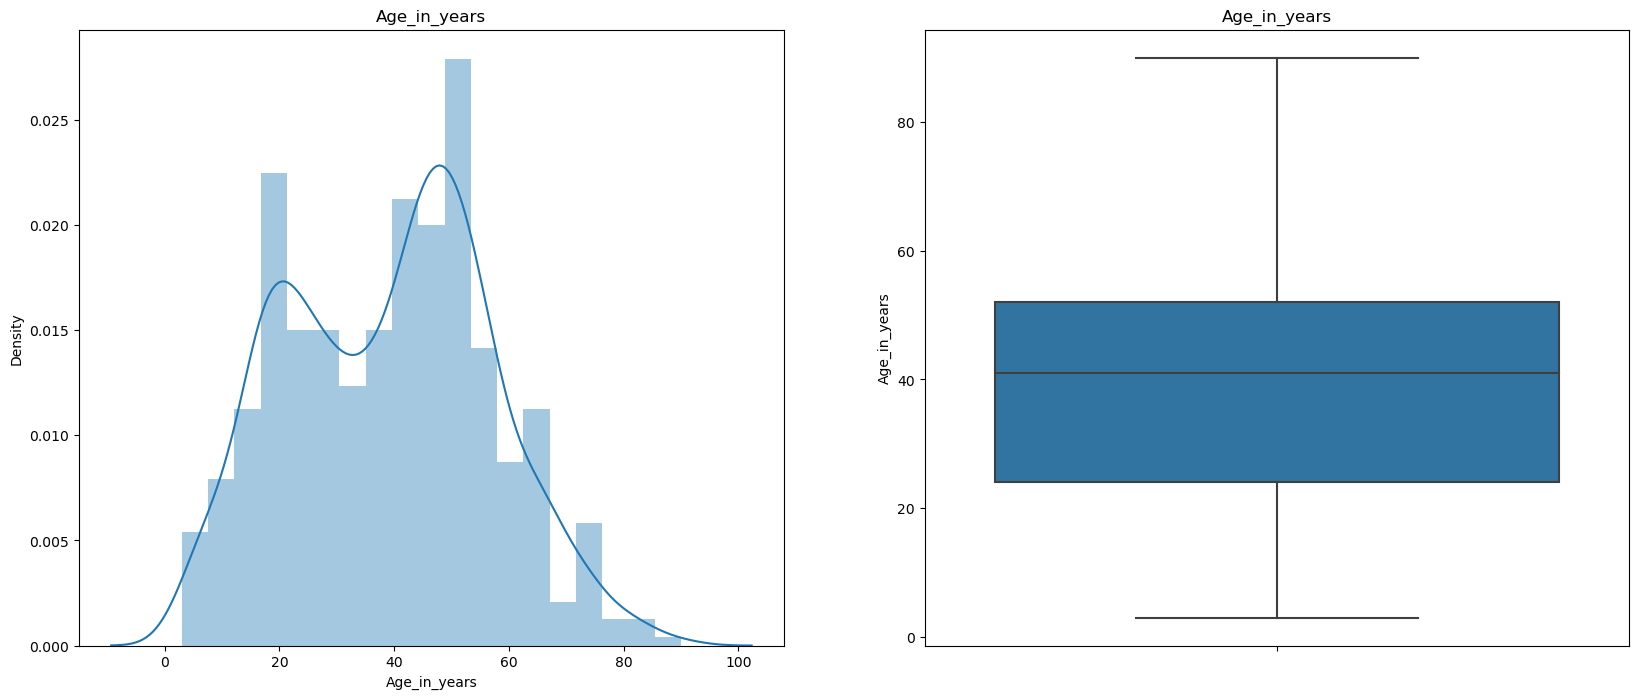

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Sex,Education,Cities,Blocks,Duration in minutes,CH1,CH3,CH4,CH5,CH2


In [860]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Age_in_years')
sns.distplot(dd['Age_in_years'])

plt.subplot(1,2,2)
plt.title('Age_in_years')
sns.boxplot(y=dd['Age_in_years'])

plt.show()

dd["Age_in_years"].skew()

# Identify the outliers
Q1 = np.percentile(dd["Age_in_years"], 25)
Q3 = np.percentile(dd["Age_in_years"], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dd[(dd["Age_in_years"] < lower_bound) | (dd["Age_in_years"] > upper_bound)]
outliers

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


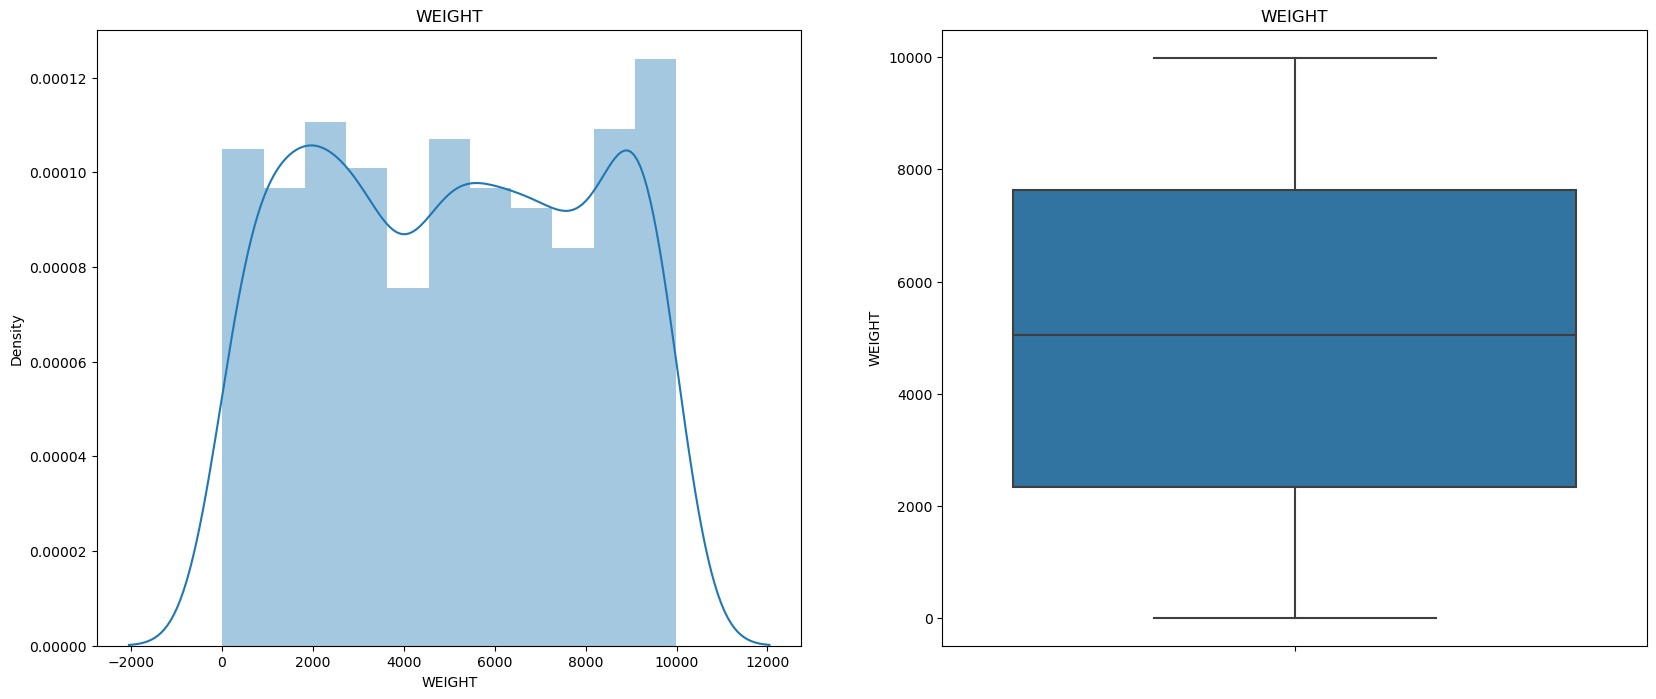

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Sex,Education,Cities,Blocks,Duration in minutes,CH1,CH3,CH4,CH5,CH2


In [861]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('WEIGHT')
sns.distplot(dd['WEIGHT'])

plt.subplot(1,2,2)
plt.title('WEIGHT')
sns.boxplot(y=dd['WEIGHT'])

plt.show()

dd["WEIGHT"].skew()

# Identify the outliers
Q1 = np.percentile(dd["WEIGHT"], 25)
Q3 = np.percentile(dd["WEIGHT"], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dd[(dd["WEIGHT"] < lower_bound) | (dd["WEIGHT"] > upper_bound)]
outliers

In [862]:
dd.columns

Index(['HH', 'INDIVIDUAL_ID', 'WEIGHT', 'Age_in_years', 'Sex', 'Education',
       'Cities', 'Blocks', 'Duration in minutes', 'CH1', 'CH3', 'CH4', 'CH5',
       'CH2'],
      dtype='object')

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


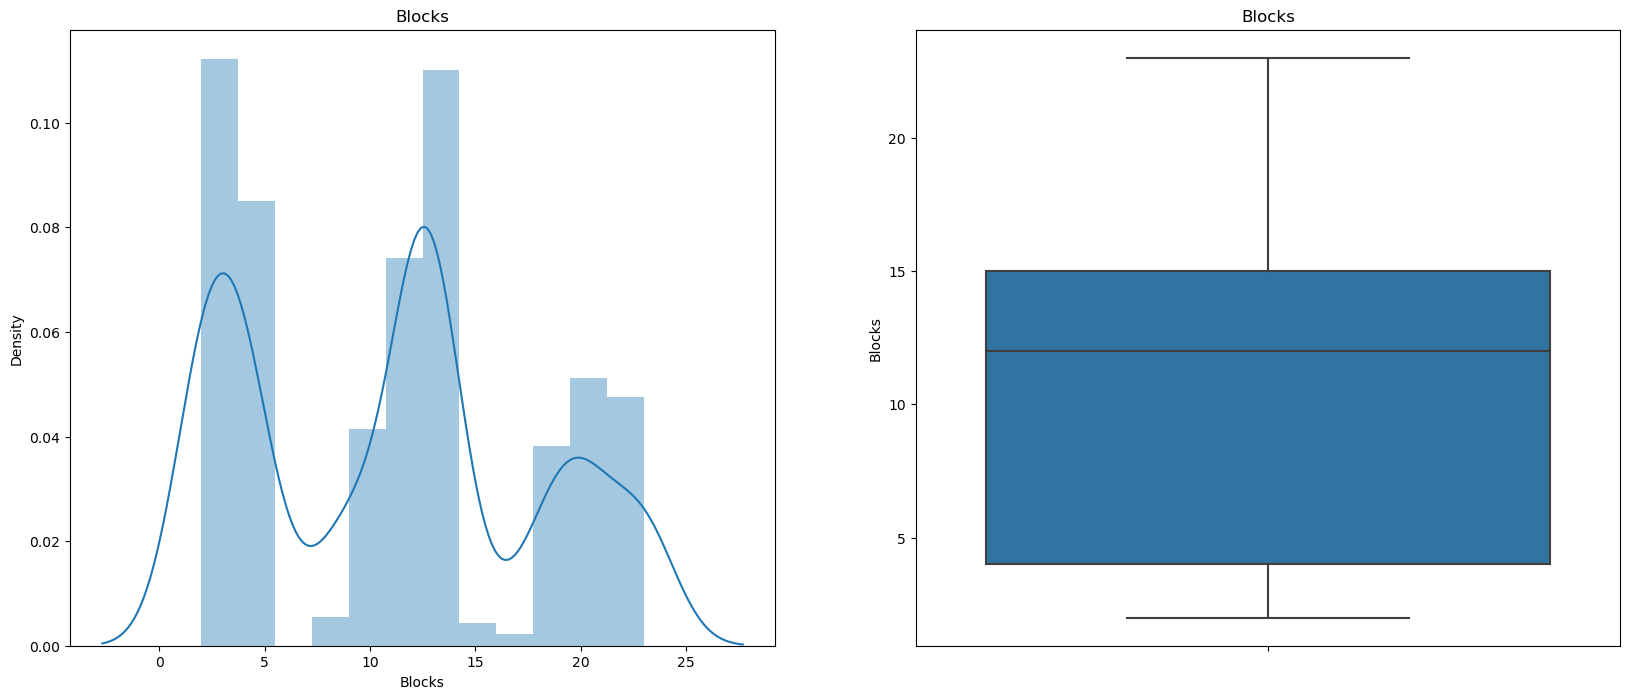

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Sex,Education,Cities,Blocks,Duration in minutes,CH1,CH3,CH4,CH5,CH2


In [863]:
# Let's get some information about our target feature
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Blocks')
sns.distplot(dd['Blocks'])

plt.subplot(1,2,2)
plt.title('Blocks')
sns.boxplot(y=dd['Blocks'])

plt.show()

dd["Blocks"].skew()

# Identify the outliers
Q1 = np.percentile(dd["Blocks"], 25)
Q3 = np.percentile(dd["Blocks"], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dd[(dd["Blocks"] < lower_bound) | (dd["Blocks"] > upper_bound)]
outliers

In [864]:
d5=dd.copy()


## Channel performance matrix:

In [865]:
Viewership_data_day2

,Date,HH,INDIVIDUAL_ID,Duration in minutes,Channels
0,2022-12-02,6283,4,7,CH4
1,2022-12-02,6283,1,97,CH1
2,2022-12-02,6283,4,99,CH1
3,2022-12-02,6283,5,69,Ch2
4,2022-12-02,6658,2,18,CH1
...,...,...,...,...,...
796,2022-12-02,5153,2,86,CH4
797,2022-12-02,5153,2,75,CH1
798,2022-12-02,5153,2,53,CH5
799,2022-12-02,5153,2,87,Ch2


In [866]:
Viewership_data_day2 = Viewership_data_day2.rename(columns={'Duration_in_minutes': 'Duration in minutes'})

In [867]:
day=pd.concat([Viewership_data_day1,Viewership_data_day2,Viewership_data_day3],axis=0)
day

,Date,HH,INDIVIDUAL_ID,Duration in minutes,Channels
0,2022-12-01,6283,4,66,CH3
1,2022-12-01,6283,1,61,CH5
2,2022-12-01,6283,4,1,CH1
3,2022-12-01,6283,5,97,Ch2
4,2022-12-01,6658,2,38,Ch2
...,...,...,...,...,...
796,2022-12-03,5153,2,71,CH5
797,2022-12-03,5153,2,54,CH5
798,2022-12-03,5153,2,34,CH3
799,2022-12-03,5153,2,53,Ch2


In [868]:
day_data=pd.merge(day,data,on=["HH","INDIVIDUAL_ID"])

In [869]:
day_data

,Date,HH,INDIVIDUAL_ID,Duration in minutes,Channels,WEIGHT,Age_in_years,Sex,Education,HH ID,Cities,Blocks
0,2022-12-01,6283,4,66,CH3,4844.772198,50,M,SSC,6283,Dallas,4
1,2022-12-01,6283,4,1,CH1,4844.772198,50,M,SSC,6283,Dallas,4
2,2022-12-02,6283,4,7,CH4,4844.772198,50,M,SSC,6283,Dallas,4
3,2022-12-02,6283,4,99,CH1,4844.772198,50,M,SSC,6283,Dallas,4
4,2022-12-03,6283,4,54,CH5,4844.772198,50,M,SSC,6283,Dallas,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2398,2022-12-03,5153,2,34,CH3,7346.853146,52,F,SSC,5153,Auckland,13
2399,2022-12-03,5153,2,53,Ch2,7346.853146,52,F,SSC,5153,Auckland,13
2400,2022-12-01,5153,3,86,CH4,8639.334048,4,M,HSC,5153,Auckland,13
2401,2022-12-02,5153,3,40,CH4,8639.334048,4,M,HSC,5153,Auckland,13


In [870]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2403 entries, 0 to 2402
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 2403 non-null   datetime64[ns]
 1   HH                   2403 non-null   int64         
 2   INDIVIDUAL_ID        2403 non-null   int64         
 3   Duration in minutes  2403 non-null   int64         
 4   Channels             2403 non-null   object        
 5   WEIGHT               2403 non-null   float64       
 6   Age_in_years         2403 non-null   int64         
 7   Sex                  2403 non-null   object        
 8   Education            2403 non-null   object        
 9   HH ID                2403 non-null   int64         
 10  Cities               2403 non-null   object        
 11  Blocks               2403 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 244.1+ KB


In [996]:
d1=day_data.groupby(['Channels'])['Duration in minutes'].mean().reset_index()
d1

,Channels,Duration in minutes
0,CH1,48.673387
1,CH3,50.556468
2,CH4,51.162281
3,CH5,51.184411
4,Ch2,53.264840


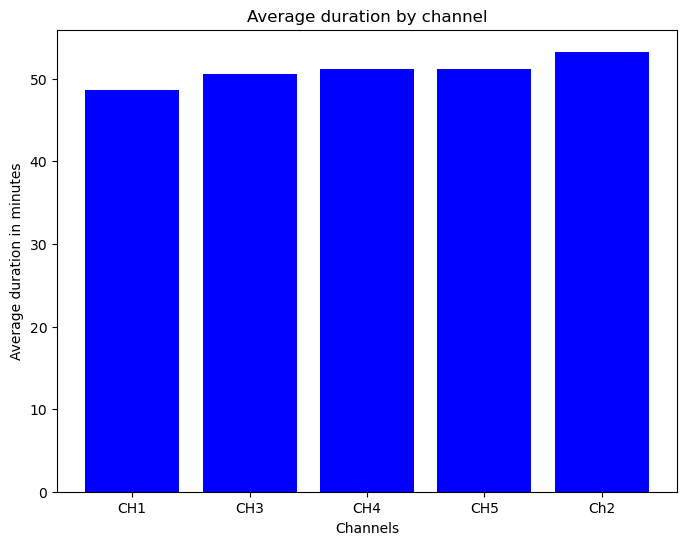

In [997]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(d1['Channels'], d1['Duration in minutes'], color='b')

# Add labels and titles
ax.set_xlabel('Channels')
ax.set_ylabel('Average duration in minutes')
ax.set_title('Average duration by channel')

plt.show()

In [998]:
d2=day_data.groupby(['Channels','Sex'])['Duration in minutes'].mean().reset_index()
d2

,Channels,Sex,Duration in minutes
0,CH1,F,48.675105
1,CH1,M,48.671815
2,CH3,F,48.348018
3,CH3,M,52.484615
4,CH4,F,49.808411
5,CH4,M,52.359504
6,CH5,F,51.895349
7,CH5,M,50.500000
8,Ch2,F,52.255208
9,Ch2,M,54.052846


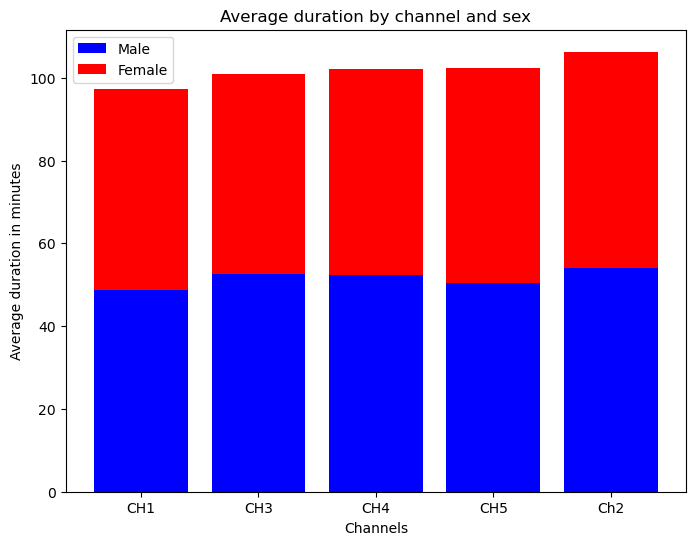

In [1000]:
# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(8,6))

# Define the x-axis and bar widths
channels = d2['Channels'].unique()
n_channels = len(channels)
bar_width = 0.8

# Create the bars for male and female
male_means = d2[d2['Sex']=='M']['Duration in minutes']
female_means = d2[d2['Sex']=='F']['Duration in minutes']
x = range(n_channels)

ax.bar(x, male_means, width=bar_width, color='b', label='Male')
ax.bar(x, female_means, width=bar_width, bottom=male_means, color='r', label='Female')

# Add labels and titles
ax.set_xticks(range(n_channels))
ax.set_xticklabels(channels)
ax.set_xlabel('Channels')
ax.set_ylabel('Average duration in minutes')
ax.set_title('Average duration by channel and sex')
ax.legend()

plt.show()



In [1001]:
d3=day_data.groupby(['Channels','Cities'])['Duration in minutes'].mean().reset_index()
d3

,Channels,Cities,Duration in minutes
0,CH1,Auckland,44.815789
1,CH1,Dallas,48.048780
2,CH1,New York,47.248889
3,CH1,NewPort,48.018868
4,CH1,San Franisco,58.824561
5,CH3,Auckland,50.526316
6,CH3,Dallas,50.565574
7,CH3,New York,50.942708
8,CH3,NewPort,50.116667
9,CH3,San Franisco,49.714286


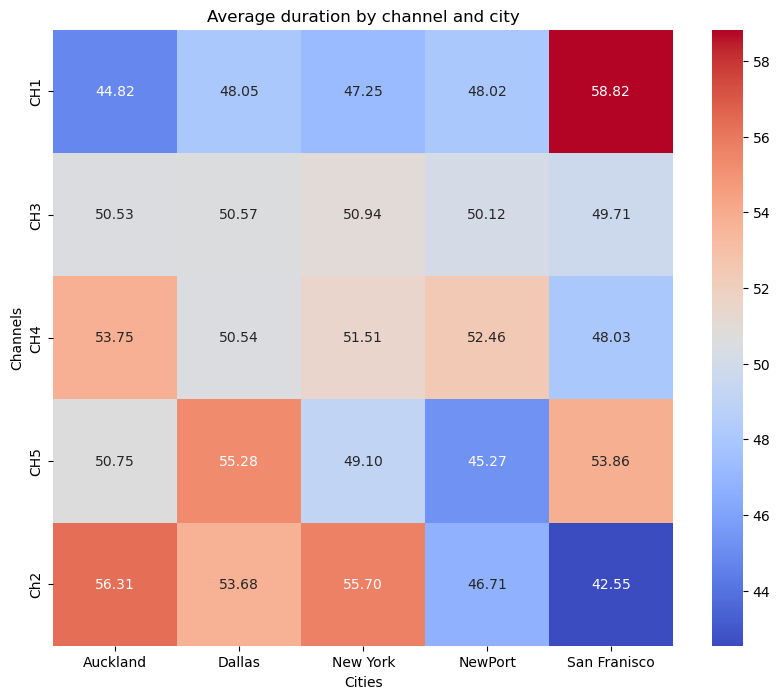

In [1002]:
# Create a pivot table with Channels as rows and Cities as columns
pivot_table = d3.pivot(index='Channels', columns='Cities', values='Duration in minutes')
# Create a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f')

# Add labels and titles
ax.set_xlabel('Cities')
ax.set_ylabel('Channels')
ax.set_title('Average duration by channel and city')

plt.show()

In [873]:
 day_data.groupby(['Channels','Cities'])['Duration in minutes'].mean().reset_index()

,Channels,Cities,Duration in minutes
0,CH1,Auckland,44.815789
1,CH1,Dallas,48.048780
2,CH1,New York,47.248889
3,CH1,NewPort,48.018868
4,CH1,San Franisco,58.824561
5,CH3,Auckland,50.526316
6,CH3,Dallas,50.565574
7,CH3,New York,50.942708
8,CH3,NewPort,50.116667
9,CH3,San Franisco,49.714286


In [874]:
d5=day_data.groupby(['Channels','Education'])['Duration in minutes'].mean().reset_index()
d5

,Channels,Education,Duration in minutes
0,CH1,Graduate,41.136364
1,CH1,HSC,46.021739
2,CH1,PG,46.739130
3,CH1,SSC,52.384615
4,CH3,Graduate,46.857143
5,CH3,HSC,49.928870
6,CH3,PG,55.076923
7,CH3,SSC,50.961538
8,CH4,Graduate,48.473684
9,CH4,HSC,50.976526


In [1010]:
d6=day_data.groupby(['Channels','Education','Sex'])['Duration in minutes'].mean().reset_index()
d6

,Channels,Education,Sex,Duration in minutes
0,CH1,Graduate,F,38.727273
1,CH1,Graduate,M,43.545455
2,CH1,HSC,F,45.053846
3,CH1,HSC,M,47.280000
4,CH1,PG,F,50.111111
5,CH1,PG,M,44.571429
6,CH1,SSC,F,55.195402
7,CH1,SSC,M,50.559701
8,CH3,Graduate,F,35.500000
9,CH3,Graduate,M,51.400000


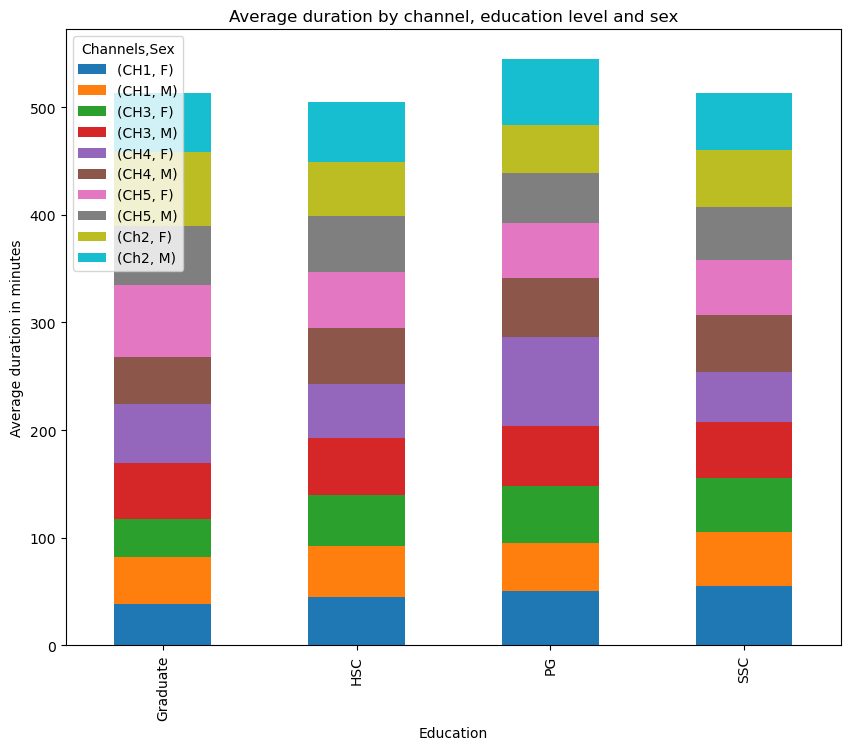

In [1011]:
# Create a pivot table with Education as rows, Channels as columns, and Sex as values
pivot_table = d6.pivot_table(index='Education', columns=['Channels', 'Sex'], values='Duration in minutes')

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10,8))
pivot_table.plot(kind='bar', stacked=True, ax=ax)

# Add labels and titles
ax.set_xlabel('Education')
ax.set_ylabel('Average duration in minutes')
ax.set_title('Average duration by channel, education level and sex')

plt.show()


In [1012]:
d7=day_data.groupby(['Channels','Education','Sex'])['Duration in minutes'].sum().reset_index()
d7

,Channels,Education,Sex,Duration in minutes
0,CH1,Graduate,F,426
1,CH1,Graduate,M,479
2,CH1,HSC,F,5857
3,CH1,HSC,M,4728
4,CH1,PG,F,451
5,CH1,PG,M,624
6,CH1,SSC,F,4802
7,CH1,SSC,M,6775
8,CH3,Graduate,F,142
9,CH3,Graduate,M,514


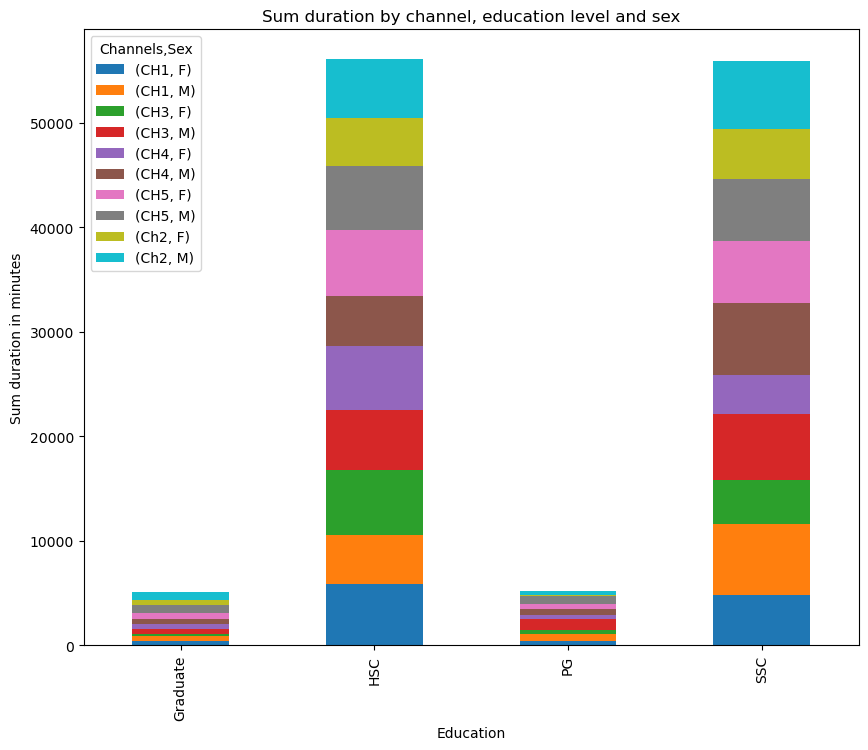

In [1014]:
# Create a pivot table with Education as rows, Channels as columns, and Sex as values
pivot_table = d7.pivot_table(index='Education', columns=['Channels', 'Sex'], values='Duration in minutes')

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10,8))
pivot_table.plot(kind='bar', stacked=True, ax=ax)

# Add labels and titles
ax.set_xlabel('Education')
ax.set_ylabel('Sum duration in minutes')
ax.set_title('Sum duration by channel, education level and sex')

plt.show()

## t test

In [975]:

# Separate duration in minutes by sex
male_duration = dd[dd['Sex'] == 'M']['Duration in minutes']
female_duration = dd[dd['Sex'] == 'F']['Duration in minutes']

# Perform two-sample t-test
t_stat, p_val = ttest_ind(male_duration, female_duration, equal_var=False)

# Print results
print("T-statistic: {:.3f}".format(t_stat))
print("P-value: {:.5f}".format(p_val))
if p_val < 0.05:
    print("There is significant difference in duration between male and female groups.")
else:
    print("There is no significant difference in duration between male and female groups.")

T-statistic: 0.004
P-value: 0.99686
There is no significant difference in duration between male and female groups.


### There is no significant difference in duration between male and female groups.

## ANOVA

In [976]:
dd = dd.rename(columns={'Duration in minutes': 'Duration_in_minutes'})



# Fit a linear regression model with HH as the dependent variable and the other variables as independent variables
model11 = ols('Duration_in_minutes ~ Education ', data=dd).fit()

model13 = ols('Duration_in_minutes ~ Cities', data=dd).fit()

dd = dd.rename(columns={'Duration_in_minutes':'Duration in minutes'})


# Calculate the ANOVA table
anova_table11 = sm.stats.anova_lm(model11, typ=2)

anova_table13 = sm.stats.anova_lm(model13, typ=2)

# Print the ANOVA table
anova_table11

,sum_sq,df,F,PR(>F)
Education,7.055696e+03,3.0,0.848536,0.467328
Residual,4.351591e+06,1570.0,NaN,NaN


### No effect of Education on Duration_in_minutes

In [977]:
anova_table13

,sum_sq,df,F,PR(>F)
Cities,2.687474e+04,4.0,2.433557,0.0456
Residual,4.331772e+06,1569.0,NaN,NaN


### There is effect of Cities on Duration_in_minutes

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### Create Dummy variables

In [879]:
# create dummy variables for categorical variables
one_hot_encoded_data = pd.get_dummies(dd, columns=['Sex',"Education",'Cities'])
one_hot_encoded_data.head()

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Blocks,Duration in minutes,CH1,CH3,CH4,CH5,...,Sex_M,Education_Graduate,Education_HSC,Education_PG,Education_SSC,Cities_Auckland,Cities_Dallas,Cities_New York,Cities_NewPort,Cities_San Franisco
0,6283,4,4844.772198,50,4,67,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
1,6283,1,6637.126847,42,4,61,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
2,6283,5,9989.732835,17,4,97,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,6658,2,9875.840557,58,4,132,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
4,6658,3,9432.010587,49,4,65,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [880]:
# (k-1) dummy variables
one_hot_encoded_data=one_hot_encoded_data.drop(["Sex_F","Cities_Dallas","Education_SSC"],axis=1)

### Define the independent and dependent variables

In [881]:
X = one_hot_encoded_data.drop(['Duration in minutes'], axis=1) # predictor variables
y = one_hot_encoded_data['Duration in minutes'] # response variable

In [882]:
X

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Blocks,CH1,CH3,CH4,CH5,CH2,Sex_M,Education_Graduate,Education_HSC,Education_PG,Cities_Auckland,Cities_New York,Cities_NewPort,Cities_San Franisco
0,6283,4,4844.772198,50,4,1,1,0,0,0,1,0,0,0,0,0,0,0
1,6283,1,6637.126847,42,4,0,0,0,1,0,0,0,0,0,0,0,0,0
2,6283,5,9989.732835,17,4,0,0,0,0,1,1,0,0,0,0,0,0,0
3,6658,2,9875.840557,58,4,0,0,0,0,2,1,1,0,0,0,0,0,0
4,6658,3,9432.010587,49,4,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,5143,3,9608.890364,53,23,0,1,0,0,0,0,0,1,0,0,0,0,0
521,5143,4,7195.189063,36,23,0,1,0,0,0,1,0,1,0,0,0,0,0
522,5143,5,9218.902004,32,23,0,1,0,0,0,1,0,0,1,0,0,0,0
523,5153,2,7346.853146,52,13,0,1,0,2,1,0,0,0,0,1,0,0,0


In [883]:
y

0       67
1       61
2       97
3      132
4       65
      ... 
520     92
521     18
522      5
523    212
524     25
Name: Duration in minutes, Length: 1574, dtype: int64

In [884]:
# Create a correlation matrix of the independent variables
correlations=X.corr()
correlations

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Blocks,CH1,CH3,CH4,CH5,CH2,Sex_M,Education_Graduate,Education_HSC,Education_PG,Cities_Auckland,Cities_New York,Cities_NewPort,Cities_San Franisco
HH,1.000000,0.002834,-0.080451,-0.015166,-0.070539,-0.004599,0.011769,0.047275,0.037782,0.042558,-0.049069,0.052236,0.094491,0.006065,-0.137399,0.194899,-0.074038,0.077900
INDIVIDUAL_ID,0.002834,1.000000,0.038904,-0.001282,0.030996,-0.030811,0.010497,0.046568,-0.031752,0.018534,-0.010742,-0.033362,-0.056889,0.047157,-0.010086,-0.013197,0.015611,0.002764
WEIGHT,-0.080451,0.038904,1.000000,-0.013212,0.031213,-0.021407,-0.005057,-0.047501,0.027738,0.062666,-0.014261,0.064336,-0.030651,0.071734,0.072937,-0.024810,0.072923,-0.069678
Age_in_years,-0.015166,-0.001282,-0.013212,1.000000,0.050210,0.063344,0.080361,0.084540,0.148536,0.100082,-0.047537,-0.014916,0.088637,0.071199,-0.032553,-0.008319,0.032394,0.038182
Blocks,-0.070539,0.030996,0.031213,0.050210,1.000000,-0.042026,0.014261,-0.032411,-0.043796,0.029494,-0.007319,-0.011340,0.071707,0.066063,0.177516,-0.179984,0.161467,0.046923
CH1,-0.004599,-0.030811,-0.021407,0.063344,-0.042026,1.000000,-0.145338,-0.123378,-0.153592,-0.148133,-0.018180,-0.003936,0.015030,0.019170,-0.082096,0.070020,-0.003398,0.023381
CH3,0.011769,0.010497,-0.005057,0.080361,0.014261,-0.145338,1.000000,-0.110171,-0.159872,-0.127212,-0.004502,-0.050673,0.049673,0.042465,-0.009401,-0.001982,0.029151,0.024738
CH4,0.047275,0.046568,-0.047501,0.084540,-0.032411,-0.123378,-0.110171,1.000000,-0.164907,-0.157246,-0.007878,-0.011300,0.018651,-0.021067,-0.010182,0.022106,-0.034853,0.050437
CH5,0.037782,-0.031752,0.027738,0.148536,-0.043796,-0.153592,-0.159872,-0.164907,1.000000,-0.103006,-0.032998,-0.005638,0.005090,0.023599,0.010492,-0.027995,-0.007592,0.018962
CH2,0.042558,0.018534,0.062666,0.100082,0.029494,-0.148133,-0.127212,-0.157246,-0.103006,1.000000,0.026546,0.005774,-0.008981,-0.048055,-0.005458,0.050224,0.005689,-0.049725


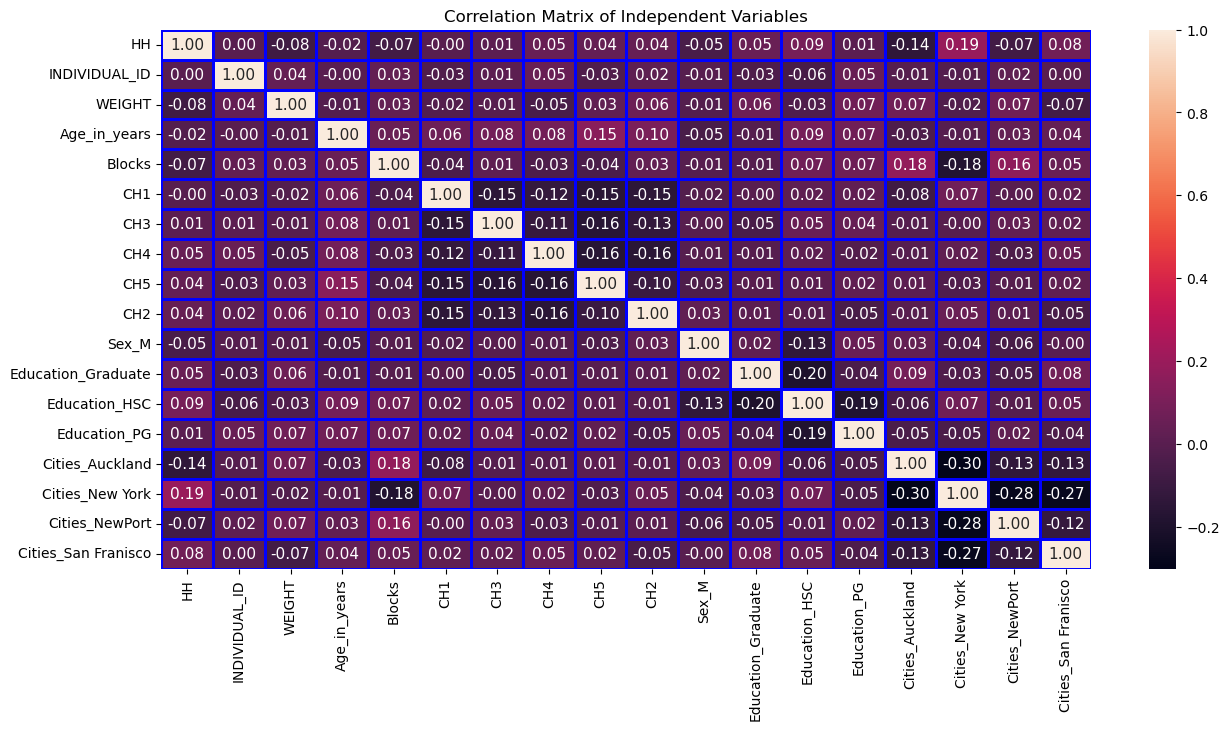

In [885]:
# Check for multicollinearity assumption
plt.figure(figsize=(15,7))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, fmt='0.2f', annot_kws={'size':11}, linewidths=2, linecolor='blue')
plt.title('Correlation Matrix of Independent Variables')
plt.show()

In [886]:
# Check for multicollinearity using VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
vif

,variables,VIF
0,HH,13.098420
1,INDIVIDUAL_ID,5.120063
2,WEIGHT,3.689643
3,Age_in_years,6.145285
4,Blocks,3.792334
5,CH1,1.622008
6,CH3,1.662445
7,CH4,1.626835
8,CH5,1.724011
9,CH2,1.584053


In [887]:
X=X.drop(["HH","INDIVIDUAL_ID"],axis=1)

### Multicollinearity is present so drop  "HH","INDIVIDUAL_ID"

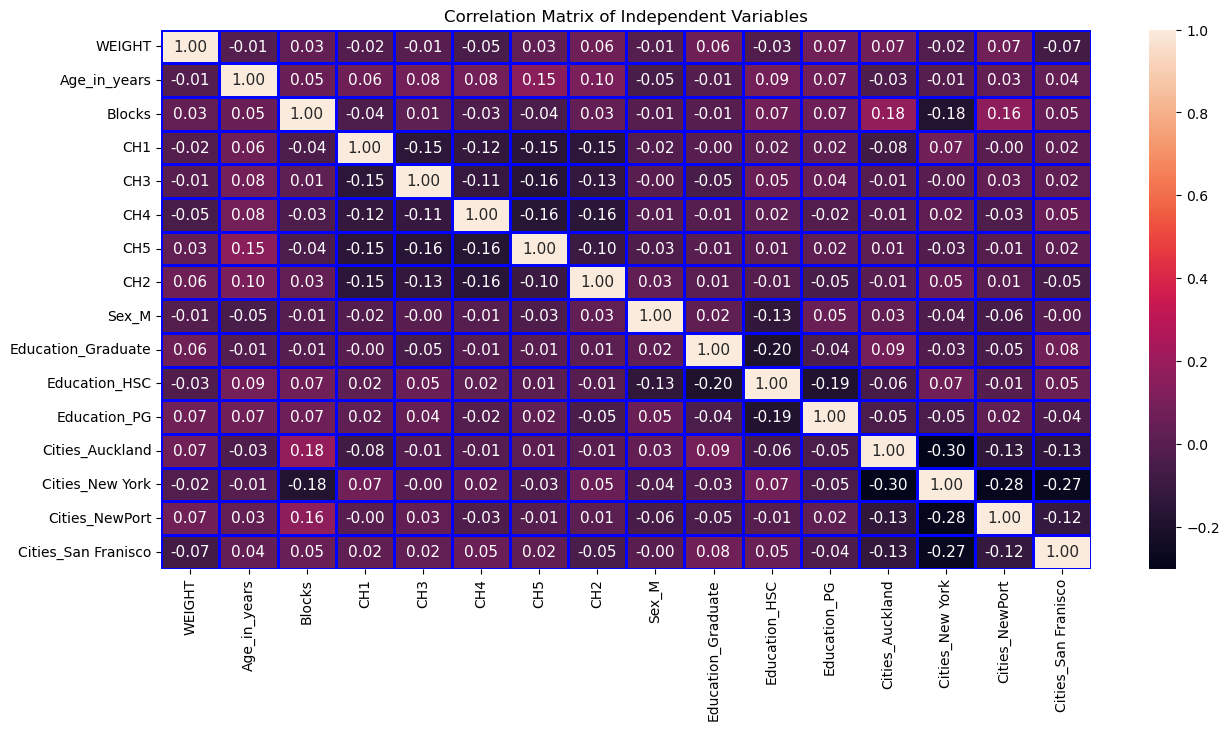

,variables,VIF
0,WEIGHT,3.351610
1,Age_in_years,5.673429
2,Blocks,3.504782
3,CH1,1.564740
4,CH3,1.602121
5,CH4,1.543504
6,CH5,1.645352
7,CH2,1.539230
8,Sex_M,1.974240
9,Education_Graduate,1.119573


In [888]:
# Check for multicollinearity assumption

plt.figure(figsize=(15,7))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, fmt='0.2f', annot_kws={'size':11}, linewidths=2, linecolor='blue')
plt.title('Correlation Matrix of Independent Variables')
plt.show()


# Check for multicollinearity using VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

### Small Multicollinearity is present in Age_in_years so we normalized the data

In [889]:
# fit a multiple linear regression model using statsmodels
# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()  # add a constant term to the predictor variables X = sm.add_constant(X) 

# print the summary of the model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Duration in minutes   R-squared:                       0.573
Model:                             OLS   Adj. R-squared:                  0.568
Method:                  Least Squares   F-statistic:                     130.4
Date:                 Mon, 24 Apr 2023   Prob (F-statistic):          2.77e-273
Time:                         08:55:31   Log-Likelihood:                -7802.4
No. Observations:                 1574   AIC:                         1.564e+04
Df Residuals:                     1557   BIC:                         1.573e+04
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2786      3.624     -0.077      0.939      -7.387       6.830
WEIGHT                  0.0004      0.000      1.459      0.145      -0.000       0.001
Age_in_years           -0.0895      0.052     -1.718      0.086      -0.192       0.013
Blocks                  0.0293      0.135      0.218      0.828      -0.235       0.293
CH1                    50.0648      1.812     27.636      0.000      46.511      53.618
CH3                    49.9890      1.927     25.938      0.000      46.209      53.769
CH4                    52.9700      1.923     27.547      0.000      49.198      56.742
CH5                    52.4310      1.787     29.348      0.000      48.927      55.935
CH2                    55.6561      1.890     29.453      0.000      51.950      59.363
Sex_M                   1.5205      1.773      0.857      0.391      -1.958       4.999
Education_Graduate     -0.3995      4.323     -0.092      0.926      -8.879       8.080
Education_HSC          -0.9240      1.865     -0.495      0.620      -4.583       2.735
Education_PG            3.1357      4.630      0.677      0.498      -5.946      12.217
Cities_Auckland        -0.8333      3.095     -0.269      0.788      -6.904       5.237
Cities_New York        -1.2085      2.201     -0.549      0.583      -5.526       3.109
Cities_NewPort         -4.9626      3.199     -1.551      0.121     -11.237       1.312
Cities_San Franisco     0.3742      3.247      0.115      0.908      -5.995       6.744
==============================================================================
Omnibus:                        1.707   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.647
Skew:                           0.015   Prob(JB):                        0.439
Kurtosis:                       2.844   Cond. No.                     3.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [890]:
from sklearn.preprocessing import MinMaxScaler


# create an instance of MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler on the column of the dataframe
scaler.fit(dd[['Age_in_years']])

# transform the column to a normalized form
dd['Age_in_years_normalized'] = scaler.transform(dd[['Age_in_years']])

dd

# fit the scaler on the column of the dataframe
scaler.fit(dd[['WEIGHT']])

# transform the column to a normalized form
dd['WEIGHT_normalized'] = scaler.transform(dd[['WEIGHT']])

dd

,HH,INDIVIDUAL_ID,WEIGHT,Age_in_years,Sex,Education,Cities,Blocks,Duration in minutes,CH1,CH3,CH4,CH5,CH2,Age_in_years_normalized,WEIGHT_normalized
0,6283,4,4844.772198,50,M,SSC,Dallas,4,67,1,1,0,0,0,0.540230,0.484619
1,6283,1,6637.126847,42,F,SSC,Dallas,4,61,0,0,0,1,0,0.448276,0.664163
2,6283,5,9989.732835,17,M,SSC,Dallas,4,97,0,0,0,0,1,0.160920,1.000000
3,6658,2,9875.840557,58,M,Graduate,Dallas,4,132,0,0,0,0,2,0.632184,0.988591
4,6658,3,9432.010587,49,F,SSC,Dallas,4,65,0,0,0,1,0,0.528736,0.944132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,5143,3,9608.890364,53,F,HSC,Dallas,23,92,0,1,0,0,0,0.574713,0.961850
521,5143,4,7195.189063,36,M,HSC,Dallas,23,18,0,1,0,0,0,0.379310,0.720065
522,5143,5,9218.902004,32,M,PG,Dallas,23,5,0,1,0,0,0,0.333333,0.922784
523,5153,2,7346.853146,52,F,SSC,Auckland,13,212,0,1,0,2,1,0.563218,0.735257


In [891]:
 X2=X.drop(["WEIGHT","Age_in_years"],axis=1)

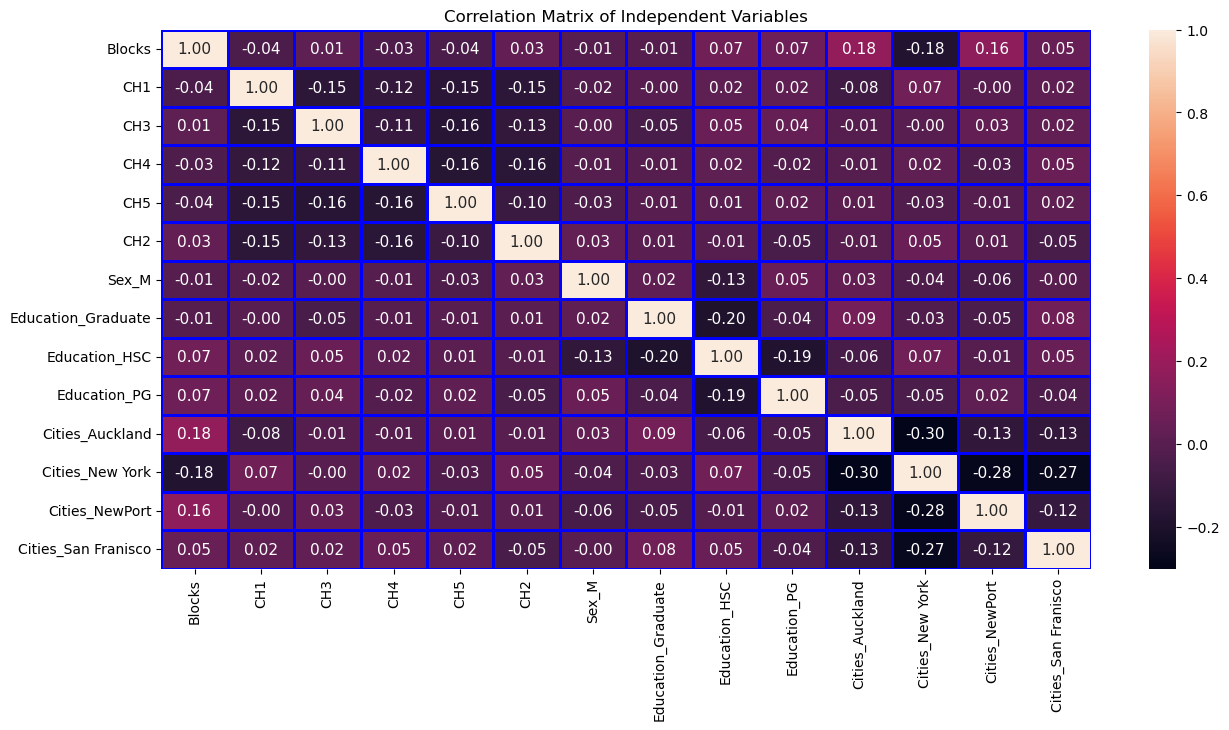

,variables,VIF
0,Blocks,3.216813
1,CH1,1.393743
2,CH3,1.433136
3,CH4,1.364457
4,CH5,1.365379
5,CH2,1.355391
6,Sex_M,1.908603
7,Education_Graduate,1.102312
8,Education_HSC,1.926657
9,Education_PG,1.105344


In [892]:
# Check for multicollinearity assumption

plt.figure(figsize=(15,7))
corr_matrix = X2.corr()
sns.heatmap(corr_matrix, annot=True, fmt='0.2f', annot_kws={'size':11}, linewidths=2, linecolor='blue')
plt.title('Correlation Matrix of Independent Variables')
plt.show()


# Check for multicollinearity using VIF
vif = pd.DataFrame()
vif["variables"] = X2.columns
vif["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif

### Here No multicollinearity

In [893]:
# fit a multiple linear regression model using statsmodels
# Fit the linear regression model
model2 = sm.OLS(y, sm.add_constant(X2)).fit()  # add a constant term to the predictor variables X = sm.add_constant(X) 

# print the summary of the model
model2.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Duration in minutes   R-squared:                       0.571
Model:                             OLS   Adj. R-squared:                  0.567
Method:                  Least Squares   F-statistic:                     148.3
Date:                 Mon, 24 Apr 2023   Prob (F-statistic):          2.48e-274
Time:                         08:55:32   Log-Likelihood:                -7805.0
No. Observations:                 1574   AIC:                         1.564e+04
Df Residuals:                     1559   BIC:                         1.572e+04
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5015      3.057     -0.164      0.870      -6.497       5.494
Blocks                  0.0176      0.134      0.131      0.896      -0.246       0.281
CH1                    49.4864      1.783     27.751      0.000      45.989      52.984
CH3                    49.3792      1.895     26.055      0.000      45.662      53.097
CH4                    52.2370      1.885     27.714      0.000      48.540      55.934
CH5                    51.7283      1.730     29.899      0.000      48.335      55.122
CH2                    55.1284      1.845     29.879      0.000      51.509      58.747
Sex_M                   1.5737      1.774      0.887      0.375      -1.906       5.053
Education_Graduate     -0.1283      4.316     -0.030      0.976      -8.595       8.338
Education_HSC          -1.1889      1.860     -0.639      0.523      -4.838       2.460
Education_PG            2.9899      4.604      0.649      0.516      -6.041      12.021
Cities_Auckland        -0.4359      3.090     -0.141      0.888      -6.498       5.626
Cities_New York        -1.1133      2.203     -0.505      0.613      -5.435       3.208
Cities_NewPort         -4.7281      3.193     -1.481      0.139     -10.992       1.535
Cities_San Franisco     0.1049      3.248      0.032      0.974      -6.265       6.475
==============================================================================
Omnibus:                        1.359   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                1.363
Skew:                           0.022   Prob(JB):                        0.506
Kurtosis:                       2.863   Cond. No.                         71.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [894]:
# Compute the residuals and the degrees of freedom
resid = model.resid
df = X.shape[0] - X.shape[1]

# Compute the variance of the residuals
s2 = np.sum(resid**2) / df

# Compute the total number of parameters
k = X.shape[1]

# Compute the Mallows' Cp statistic
Cp = (np.sum(resid**2) + 2*k*s2) / (df*s2) - X.shape[0] + 2*k

print("Mallows' Cp: {:.4f}".format(Cp))

Mallows' Cp: -1540.9795


In [895]:

X3=X2.drop(["Blocks"],axis=1)
X4=X3.drop(["CH1"],axis=1)


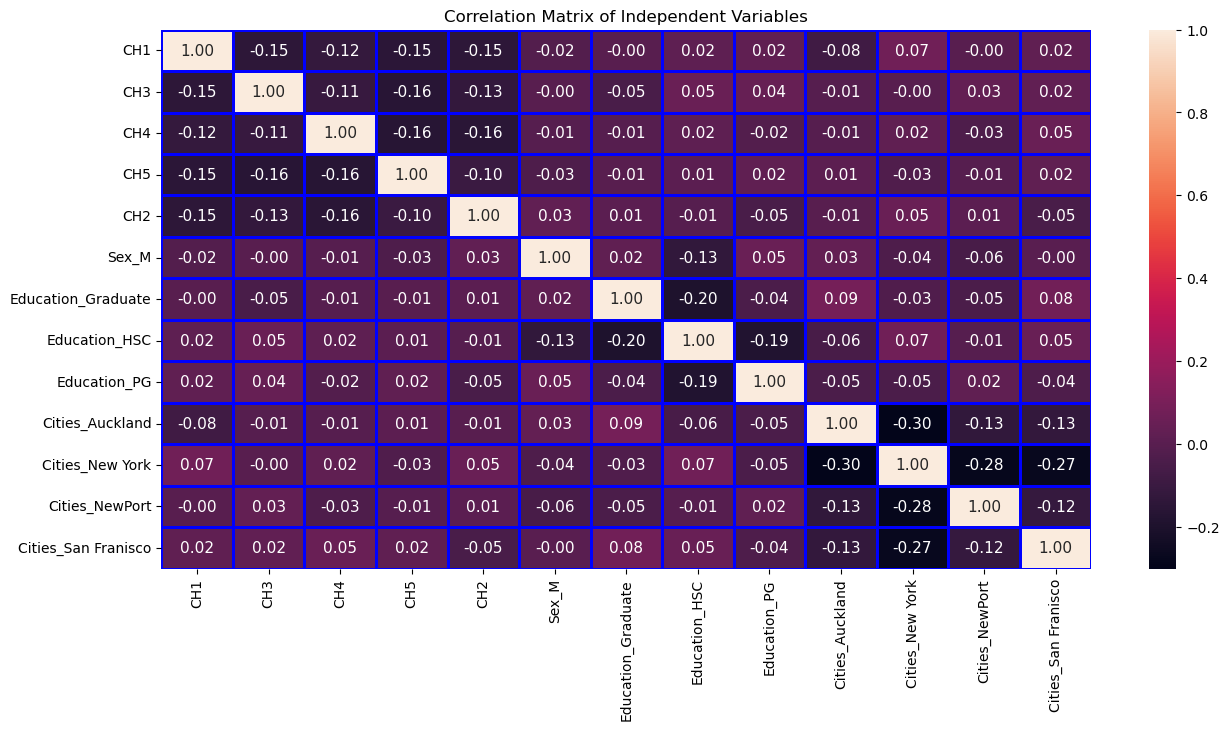

,variables,VIF
0,CH1,0.204485
1,CH3,0.070175
2,CH4,0.035667
3,CH5,0.279989
4,CH2,0.039738
5,Sex_M,0.169220
6,Education_Graduate,1.099210
7,Education_HSC,0.506295
8,Education_PG,1.080327
9,Cities_Auckland,1.287964


In [896]:
# Check for multicollinearity assumption

plt.figure(figsize=(15,7))
corr_matrix = X3.corr()
sns.heatmap(corr_matrix, annot=True, fmt='0.2f', annot_kws={'size':11}, linewidths=2, linecolor='blue')
plt.title('Correlation Matrix of Independent Variables')
plt.show()

# Check for multicollinearity using VIF
vif = pd.DataFrame()
vif["variables"] = X3.columns
vif["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif


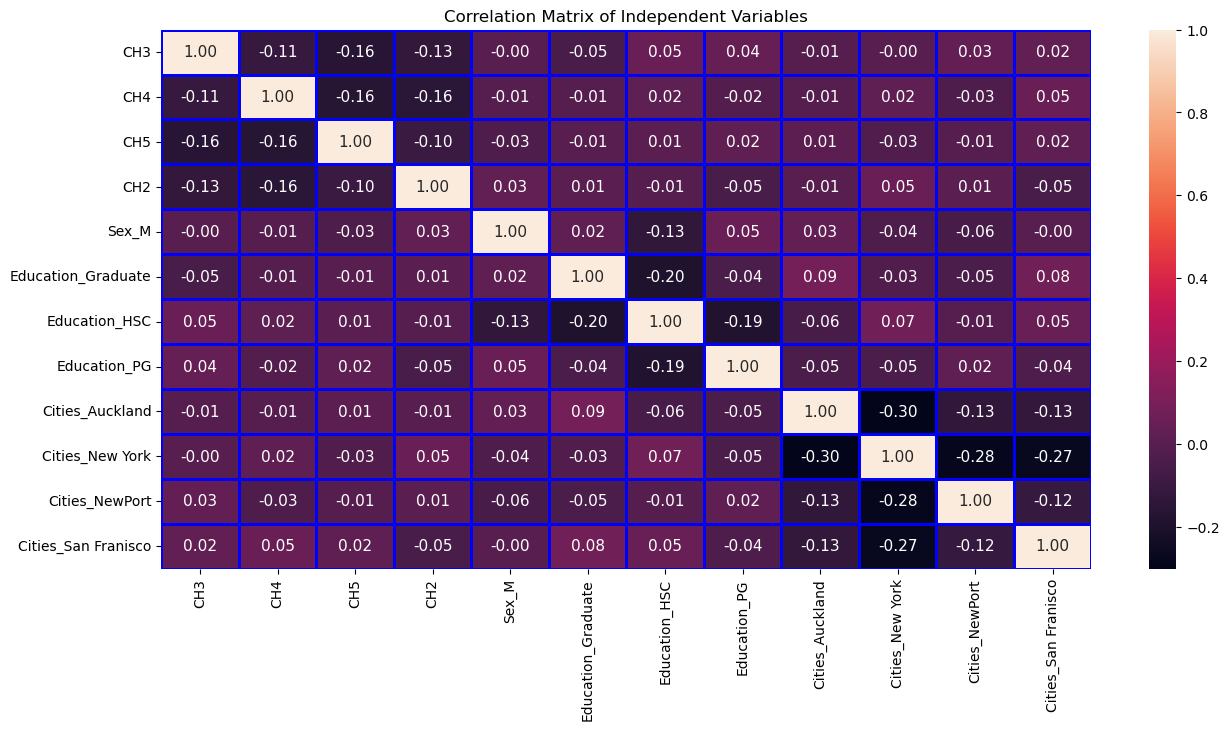

,variables,VIF
0,CH3,0.068972
1,CH4,0.035214
2,CH5,0.275777
3,CH2,0.039065
4,Sex_M,0.164572
5,Education_Graduate,1.097231
6,Education_HSC,0.492762
7,Education_PG,1.071523
8,Cities_Auckland,1.274245
9,Cities_New York,0.337628


In [897]:
# Check for multicollinearity assumption

plt.figure(figsize=(15,7))
corr_matrix = X4.corr()
sns.heatmap(corr_matrix, annot=True, fmt='0.2f', annot_kws={'size':11}, linewidths=2, linecolor='blue')
plt.title('Correlation Matrix of Independent Variables')
plt.show()

# Check for multicollinearity using VIF
vif = pd.DataFrame()
vif["variables"] = X4.columns
vif["VIF"] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif

In [898]:
# fit a multiple linear regression model using statsmodels

model3 = sm.OLS(y, sm.add_constant(X3)).fit()  

# print the summary of the model
model3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Duration in minutes   R-squared:                       0.571
Model:                             OLS   Adj. R-squared:                  0.568
Method:                  Least Squares   F-statistic:                     159.8
Date:                 Mon, 24 Apr 2023   Prob (F-statistic):          1.94e-275
Time:                         08:55:35   Log-Likelihood:                -7805.0
No. Observations:                 1574   AIC:                         1.564e+04
Df Residuals:                     1560   BIC:                         1.571e+04
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3272      2.751     -0.119      0.905      -5.722       5.068
CH1                    49.4769      1.781     27.778      0.000      45.983      52.971
CH3                    49.3745      1.894     26.065      0.000      45.659      53.090
CH4                    52.2269      1.883     27.741      0.000      48.534      55.920
CH5                    51.7141      1.726     29.959      0.000      48.328      55.100
CH2                    55.1331      1.844     29.896      0.000      51.516      58.750
Sex_M                   1.5737      1.773      0.887      0.375      -1.905       5.052
Education_Graduate     -0.1315      4.315     -0.030      0.976      -8.595       8.332
Education_HSC          -1.1638      1.850     -0.629      0.529      -4.793       2.465
Education_PG            3.0482      4.581      0.665      0.506      -5.938      12.034
Cities_Auckland        -0.3599      3.034     -0.119      0.906      -6.312       5.592
Cities_New York        -1.1241      2.201     -0.511      0.610      -5.441       3.193
Cities_NewPort         -4.6573      3.146     -1.480      0.139     -10.828       1.514
Cities_San Franisco     0.1396      3.236      0.043      0.966      -6.207       6.487
==============================================================================
Omnibus:                        1.359   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                1.362
Skew:                           0.022   Prob(JB):                        0.506
Kurtosis:                       2.863   Cond. No.                         8.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [899]:
# fit a multiple linear regression model using statsmodels

model4 = sm.OLS(y, sm.add_constant(X4)).fit()  

# print the summary of the model
model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Duration in minutes   R-squared:                       0.359
Model:                             OLS   Adj. R-squared:                  0.354
Method:                  Least Squares   F-statistic:                     72.89
Date:                 Mon, 24 Apr 2023   Prob (F-statistic):          2.36e-141
Time:                         08:55:35   Log-Likelihood:                -8121.3
No. Observations:                 1574   AIC:                         1.627e+04
Df Residuals:                     1561   BIC:                         1.634e+04
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  28.4625      3.114      9.141      0.000      22.355      34.570
CH3                    36.2212      2.242     16.159      0.000      31.824      40.618
CH4                    39.8166      2.235     17.813      0.000      35.432      44.201
CH5                    39.3773      2.039     19.316      0.000      35.379      43.376
CH2                    42.5306      2.185     19.469      0.000      38.246      46.816
Sex_M                   0.7201      2.167      0.332      0.740      -3.530       4.970
Education_Graduate     -1.4565      5.273     -0.276      0.782     -11.800       8.887
Education_HSC          -0.0724      2.261     -0.032      0.974      -4.506       4.362
Education_PG            6.6235      5.597      1.184      0.237      -4.354      17.601
Cities_Auckland        -4.1559      3.705     -1.122      0.262     -11.423       3.111
Cities_New York         3.4070      2.682      1.270      0.204      -1.855       8.669
Cities_NewPort         -3.1963      3.844     -0.831      0.406     -10.737       4.344
Cities_San Franisco     4.8342      3.949      1.224      0.221      -2.912      12.581
==============================================================================
Omnibus:                       69.149   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.567
Skew:                           0.505   Prob(JB):                     8.70e-18
Kurtosis:                       3.421   Cond. No.                         8.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Test for Linearity

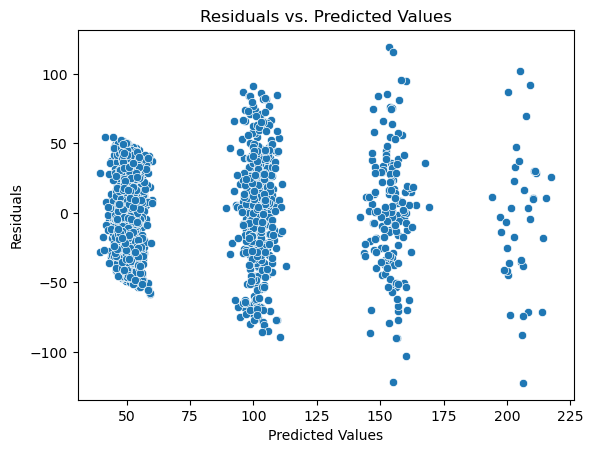

In [900]:
# Check for linearity assumption
# Create a scatterplot of the residuals vs. predicted values
sns.scatterplot(x=model.predict(), y=model.resid)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [901]:
import statsmodels.api as sm
from statsmodels.stats.api import linear_reset
# Test for Linearity
# Perform RESET test
reset = linear_reset(model)
print(reset.summary())

# Hence Linearity assumption is satisfied


<Wald test (chi2): statistic=1.2517637370220942, p-value=0.5347896063931168, df_denom=2>


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


### Hence Linearity assumption is satisfied

### Homoscedasticity

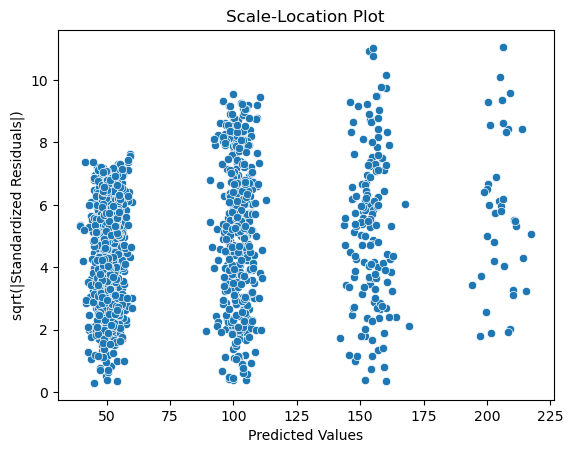

In [902]:
# Check for homoscedasticity assumption
# Create a scatterplot of the residuals vs. predicted values
sns.scatterplot(x=model.predict(), y=np.sqrt(np.abs(model.resid)))
plt.title('Scale-Location Plot')
plt.xlabel('Predicted Values')
plt.ylabel('sqrt(|Standardized Residuals|)')
plt.show()

In [904]:
from statsmodels.stats.diagnostic import het_white

# Run the White test
white_test = het_white(model.resid, model.model.exog)

# Print the results of the test
print("White test p-value:", white_test[1])

White test p-value: 1.0614903856948267e-12


### Homoscedasticity not satisfied

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


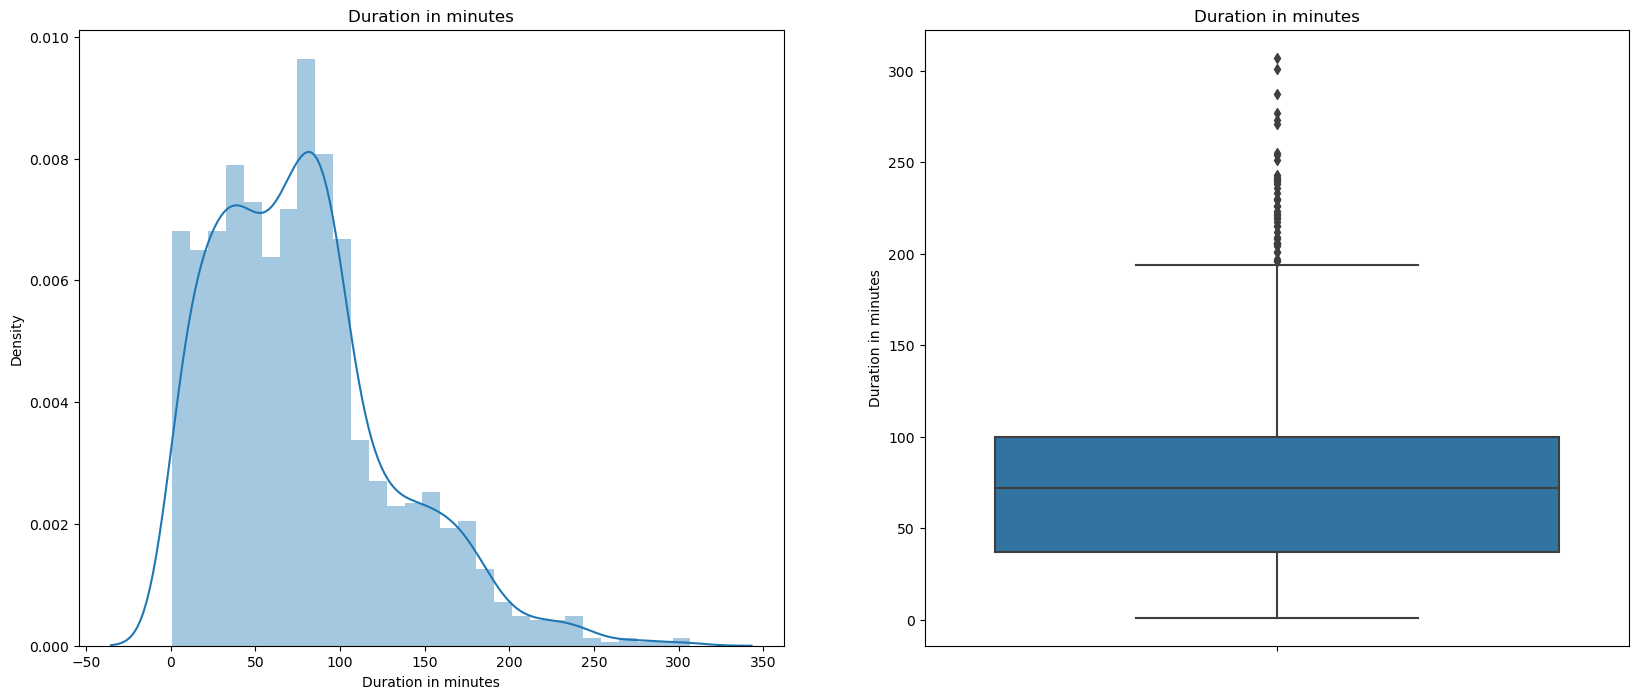

0.9283578144636668

In [907]:
# Let's get some information about our target feature
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Duration in minutes')
sns.distplot(dd['Duration in minutes'])

plt.subplot(1,2,2)
plt.title('Duration in minutes')
sns.boxplot(y=dd['Duration in minutes'])

plt.show()

dd['Duration in minutes'].skew()


## Target variable is positive skewed and outlier present


In [974]:
# Calculate the z-scores of column 'A'
# z_scores = np.abs((df['A'] - df['A'].mean()) / df['A'].std())
z_scores = np.abs((y - y.mean()) / y.std())
# Find the indices of the outliers (z-score > 3)
outlier_indices = np.where(z_scores > 3)[0]

# Print the outlier indices
print("Outlier indices:", outlier_indices)
z_scores[z_scores>3]



Outlier indices: [  31  174  195  312  523  588  680  795  979 1047 1087 1223 1319 1370
 1396 1474 1504]


31     3.709792
174    3.082886
195    3.006897
312    3.120880
523    3.101883
63     3.139877
155    4.355695
270    3.671797
455    3.291854
523    4.241712
38     3.367843
174    3.101883
270    3.348846
321    3.063889
347    3.044891
425    3.975752
455    3.785780
Name: Duration in minutes, dtype: float64

### Transformation

In [928]:
# Take the natural logarithm transformation of the data
y2 = np.log(y)
# # Take the square root transformation of the data
y1 = np.sqrt(y)
y3=np.exp(y)

### TEST FOR NORMALITY

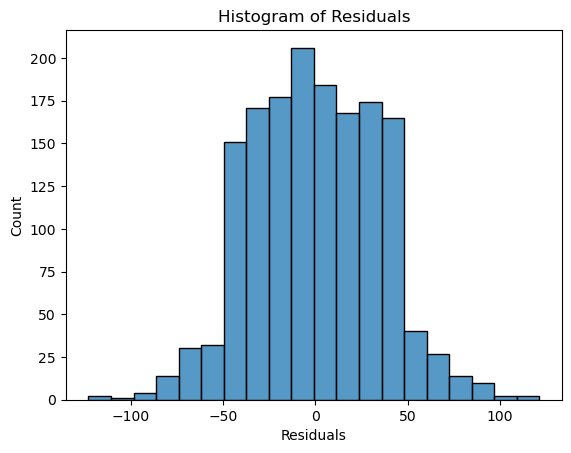

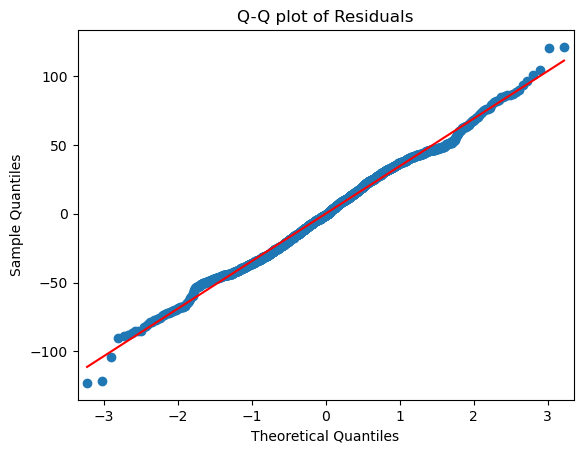

In [954]:

# The Residuals should be normally distributed.


# Check for normality assumption
# Create a histogram of the residuals
# Get the residuals
residuals = model.resid

# Plot histogram of residuals
sns.histplot(model.resid, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

# Plot Q-Q plot of residuals
fig, ax = plt.subplots()
sm.qqplot(residuals, line='r', ax=ax)
ax.set_title('Q-Q plot of Residuals')
plt.show()

from scipy import stats

# normality of the residuals is being tested
stat, p_value = stats.shapiro(residuals)

# print the test statistic and p-value
print("Shapiro-Wilk test statistic: {:.4f}".format(stat))
print("p-value: {:.4f}".format(p_value))
# Hence the Test for Normality is not satisfied.

Shapiro-Wilk test statistic: nan
p-value: 1.0000


In [920]:
# from scipy.stats import boxcox

# # Box-Cox transformation with lambda=0.5
# y1 = boxcox(y, lmbda=0.5)


In [935]:
# # fit a multiple linear regression model using statsmodels

# model = sm.OLS(y3, sm.add_constant(X)).fit()  

# # print the summary of the model
model.summary()

C:\Users\dell\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1241: RuntimeWarning: overflow encountered in multiply
  s *= a_zero_mean
C:\Users\dell\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\dell\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1239: RuntimeWarning: overflow encountered in square
  s = s**2


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Duration in minutes   R-squared:                       0.019
Model:                             OLS   Adj. R-squared:                  0.009
Method:                  Least Squares   F-statistic:                     1.923
Date:                 Mon, 24 Apr 2023   Prob (F-statistic):             0.0151
Time:                         09:12:45   Log-Likelihood:            -4.7964e+05
No. Observations:                 1574   AIC:                         9.593e+05
Df Residuals:                     1557   BIC:                         9.594e+05
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                9.559e+129   5.6e+130      0.171      0.864     -1e+131   1.19e+131
WEIGHT               3.234e+126  4.59e+126      0.705      0.481  -5.77e+126   1.22e+127
Age_in_years        -1.227e+129  8.05e+128     -1.524      0.128  -2.81e+129   3.52e+128
Blocks               -1.93e+129  2.08e+129     -0.929      0.353  -6.01e+129   2.15e+129
CH1                   7.36e+130   2.8e+130      2.629      0.009   1.87e+130   1.29e+131
CH3                  1.274e+131  2.98e+130      4.280      0.000    6.9e+130   1.86e+131
CH4                  3.077e+130  2.97e+130      1.036      0.300  -2.75e+130    8.9e+130
CH5                  2.912e+130  2.76e+130      1.055      0.292   -2.5e+130   8.33e+130
CH2                  7.961e+130  2.92e+130      2.727      0.006   2.23e+130   1.37e+131
Sex_M               -2.984e+130  2.74e+130     -1.089      0.276  -8.36e+130   2.39e+130
Education_Graduate   1.591e+130  6.68e+130      0.238      0.812  -1.15e+131   1.47e+131
Education_HSC        3.025e+130  2.88e+130      1.050      0.294  -2.63e+130   8.68e+130
Education_PG        -6.657e+129  7.15e+130     -0.093      0.926  -1.47e+131   1.34e+131
Cities_Auckland     -4.205e+130  4.78e+130     -0.879      0.379  -1.36e+131   5.17e+130
Cities_New York     -6.858e+130   3.4e+130     -2.016      0.044  -1.35e+131  -1.87e+129
Cities_NewPort      -5.725e+130  4.94e+130     -1.158      0.247  -1.54e+131   3.97e+130
Cities_San Franisco  -5.94e+130  5.02e+130     -1.184      0.237  -1.58e+131    3.9e+130
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.996
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     3.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [475]:
# Mean of residual
# Residual is the difference between the observed value and the fitted value to 
# the best fit line.
# Mean of residual = 0

round(residuals.mean(),4)

0.0

### Autocorrelation using the Durbin-Watson test

In [476]:
# Check for autocorrelation using the Durbin-Watson test
dw_test = sm.stats.stattools.durbin_watson(model.resid)

print('Durbin-Watson test statistic: ', dw_test)

# If the DW test statistic is close to 2 (between 1.5 and 2.5), it suggests that there is no significant autocorrelation in the residuals. If the DW test statistic is significantly less than 2, it suggests the presence of positive autocorrelation, and if it is significantly greater than 2, it suggests the presence of negative autocorrelation.

Durbin-Watson test statistic:  2.008088333805835


### No autocorrelation

## Features selection

In [938]:
# Fit a multiple linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the summary of the model
print(model.summary())

# Perform backward feature selection based on p-values
p_threshold = 0.05
while True:
    p_values = model.pvalues.iloc[1:]
    max_p = p_values.max()
    if max_p > p_threshold:
        drop_feature = p_values.idxmax()
        X = X.drop(drop_feature, axis=1)
        model = sm.OLS(y, sm.add_constant(X)).fit()
    else:
        break

                             OLS Regression Results                            
Dep. Variable:     Duration in minutes   R-squared:                       0.573
Model:                             OLS   Adj. R-squared:                  0.568
Method:                  Least Squares   F-statistic:                     130.4
Date:                 Mon, 24 Apr 2023   Prob (F-statistic):          2.77e-273
Time:                         09:14:03   Log-Likelihood:                -7802.4
No. Observations:                 1574   AIC:                         1.564e+04
Df Residuals:                     1557   BIC:                         1.573e+04
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -

In [939]:
# Print the final set of selected features
print('Selected features:', list(X.columns))

Selected features: ['CH1', 'CH3', 'CH4', 'CH5', 'CH2']


In [940]:
X = one_hot_encoded_data.drop(['Duration in minutes'], axis=1) # predictor variables
y = one_hot_encoded_data['Duration in minutes']

In [941]:
X.columns

Index(['HH', 'INDIVIDUAL_ID', 'WEIGHT', 'Age_in_years', 'Blocks', 'CH1', 'CH3',
       'CH4', 'CH5', 'CH2', 'Sex_M', 'Education_Graduate', 'Education_HSC',
       'Education_PG', 'Cities_Auckland', 'Cities_New York', 'Cities_NewPort',
       'Cities_San Franisco'],
      dtype='object')

In [978]:
XX=X[['CH1', 'CH3', 'CH4', 'CH5', 'CH2']]
XX

,CH1,CH3,CH4,CH5,CH2
0,1,1,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,0,2
4,0,0,0,1,0
...,...,...,...,...,...
520,0,1,0,0,0
521,0,1,0,0,0
522,0,1,0,0,0
523,0,1,0,2,1


In [979]:
# fit a multiple linear regression model using statsmodels
# Fit the linear regression model
model2 = sm.OLS(y, sm.add_constant(XX)).fit()  # add a constant term to the predictor variables X = sm.add_constant(X) 

# print the summary of the model
model2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Duration in minutes   R-squared:                       0.570
Model:                             OLS   Adj. R-squared:                  0.568
Method:                  Least Squares   F-statistic:                     415.5
Date:                 Mon, 24 Apr 2023   Prob (F-statistic):          3.99e-284
Time:                         10:00:44   Log-Likelihood:                -7807.5
No. Observations:                 1574   AIC:                         1.563e+04
Df Residuals:                     1568   BIC:                         1.566e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7456      1.937     -0.385      0.700      -4.546       3.055
CH1           49.3700      1.765     27.977      0.000      45.909      52.831
CH3           49.2443      1.880     26.189      0.000      45.556      52.933
CH4           52.1990      1.872     27.880      0.000      48.527      55.871
CH5           51.6844      1.720     30.046      0.000      48.310      55.058
CH2           55.0136      1.836     29.969      0.000      51.413      58.614
==============================================================================
Omnibus:                        1.499   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.492
Skew:                           0.027   Prob(JB):                        0.474
Kurtosis:                       2.859   Cond. No.                         4.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Measure of your model accuracy


### R-squared is 0.570
### Adjusted R-squared: 0.568

In [986]:
# calculate the RMSE value
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 34.51251991246428


In [984]:
# calculate the MAE value
mae = np.mean(np.abs(y - y_pred))
print("MAE:", mae)

MAE: 5.181490893689115


### RMSE: 34.51251991246428
### MAE: 5.181490893689115

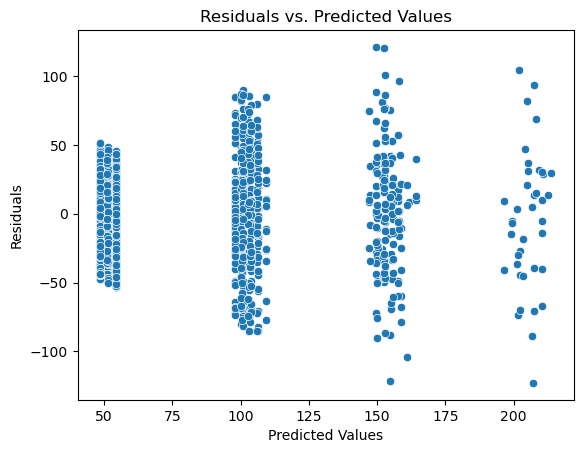

In [944]:
# Check for linearity assumption
# Create a scatterplot of the residuals vs. predicted values
sns.scatterplot(x=model2.predict(), y=model2.resid)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [946]:
import statsmodels.api as sm
from statsmodels.stats.api import linear_reset
# Test for Linearity
# Perform RESET test
reset = linear_reset(model2)
print(reset.summary())

# Hence Linearity assumption is satisfied

<Wald test (chi2): statistic=1.3262027723470475, p-value=0.5152508620335738, df_denom=2>


 ## Linearity assumption is satisfied

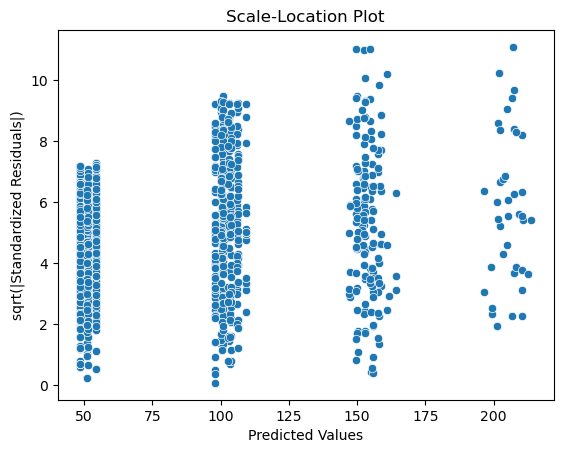

In [947]:
# Check for homoscedasticity assumption
# Create a scatterplot of the residuals vs. predicted values
sns.scatterplot(x=model2.predict(), y=np.sqrt(np.abs(model2.resid)))
plt.title('Scale-Location Plot')
plt.xlabel('Predicted Values')
plt.ylabel('sqrt(|Standardized Residuals|)')
plt.show()

In [948]:
from statsmodels.stats.diagnostic import het_white

# Run the White test
white_test = het_white(model2.resid, model2.model.exog)

# Print the results of the test
print("White test p-value:", white_test[1])

White test p-value: 3.257666995899903e-23


### Homoscedasticity not satisfied

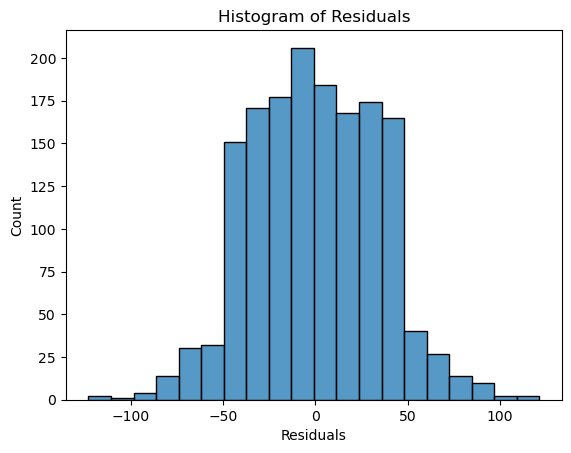

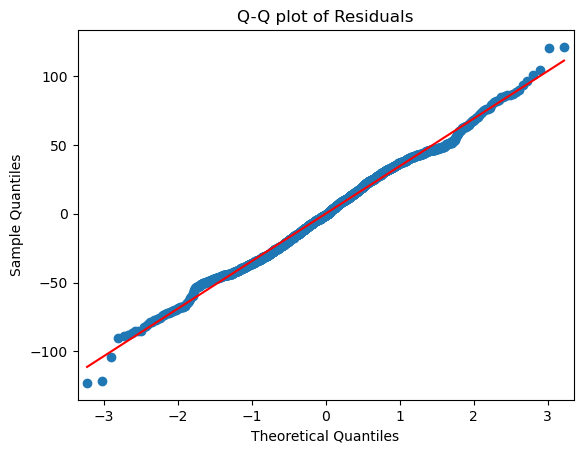

Shapiro-Wilk test statistic: 0.9947
p-value: 0.0000


In [955]:
# TEST FOR NORMALITY
# The Residuals should be normally distributed.


# Check for normality assumption
# Create a histogram of the residuals
# Get the residuals
residuals = model2.resid

# Plot histogram of residuals
sns.histplot(model2.resid, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

# Plot Q-Q plot of residuals
fig, ax = plt.subplots()
sm.qqplot(residuals, line='r', ax=ax)
ax.set_title('Q-Q plot of Residuals')
plt.show()

from scipy import stats

# normality of the residuals is being tested
stat, p_value = stats.shapiro(residuals)

# print the test statistic and p-value
print("Shapiro-Wilk test statistic: {:.4f}".format(stat))
print("p-value: {:.4f}".format(p_value))
# Hence the Test for Normality is not satisfied.

In [956]:
# Mean of residual
# Residual is the difference between the observed value and the fitted value to 
# the best fit line.
# Mean of residual = 0


round(residuals.mean(),4)

0.0

In [957]:
# Check for autocorrelation using the Durbin-Watson test
dw_test = sm.stats.stattools.durbin_watson(model2.resid)

print('Durbin-Watson test statistic: ', dw_test)


Durbin-Watson test statistic:  2.010029550957644


## No autocorrelation.

## Decision Tree

In [958]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# create and fit the decision tree regression model
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

# predict the response variable using the fitted model
y_pred = regressor.predict(X)

# print the predicted response variable and the R-squared value
print("Predicted response:", y_pred)
print("R-squared:", regressor.score(X, y))


Predicted response: [ 67.          61.          77.66666667 ...  41.5        212.
  25.        ]
R-squared: 0.9505942554314


In [960]:
from scipy.stats import shapiro
residuals = y - y_pred

# perform Shapiro-Wilk test on the residuals
stat, p = shapiro(residuals)

# print the test statistic and p-value
print("Shapiro-Wilk test statistic:", stat)
print("Shapiro-Wilk p-value:", p)

Shapiro-Wilk test statistic: 0.6848387718200684
Shapiro-Wilk p-value: 0.0


In [963]:
y

0       67
1       61
2       97
3      132
4       65
      ... 
520     92
521     18
522      5
523    212
524     25
Name: Duration in minutes, Length: 1574, dtype: int64

In [964]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# create and fit the decision tree regression model
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(XX, y)

# predict the response variable using the fitted model
y_pred = regressor.predict(XX)

# print the predicted response variable and the R-squared value
print("Predicted response:", y_pred)
print("R-squared:", regressor.score(XX, y))


Predicted response: [ 97.26470588  51.27403846  54.12716763 ...  46.00966184 165.
  46.00966184]
R-squared: 0.6117616265410706


In [965]:
from scipy.stats import shapiro
residuals = y - y_pred

# perform Shapiro-Wilk test on the residuals
stat, p = shapiro(residuals)

# print the test statistic and p-value
print("Shapiro-Wilk test statistic:", stat)
print("Shapiro-Wilk p-value:", p)

Shapiro-Wilk test statistic: 0.9924253225326538
Shapiro-Wilk p-value: 3.0977446385804797e-07


In [967]:
X.columns

Index(['HH', 'INDIVIDUAL_ID', 'WEIGHT', 'Age_in_years', 'Blocks', 'CH1', 'CH3',
       'CH4', 'CH5', 'CH2', 'Sex_M', 'Education_Graduate', 'Education_HSC',
       'Education_PG', 'Cities_Auckland', 'Cities_New York', 'Cities_NewPort',
       'Cities_San Franisco'],
      dtype='object')

In [968]:
Xd1=X[['WEIGHT', 'Age_in_years', 'Blocks', 'CH1', 'CH3',
       'CH4', 'CH5', 'CH2', 'Sex_M', 'Education_Graduate', 'Education_HSC',
       'Education_PG', 'Cities_Auckland', 'Cities_New York', 'Cities_NewPort',
       'Cities_San Franisco']]

In [969]:
Xd1

,WEIGHT,Age_in_years,Blocks,CH1,CH3,CH4,CH5,CH2,Sex_M,Education_Graduate,Education_HSC,Education_PG,Cities_Auckland,Cities_New York,Cities_NewPort,Cities_San Franisco
0,4844.772198,50,4,1,1,0,0,0,1,0,0,0,0,0,0,0
1,6637.126847,42,4,0,0,0,1,0,0,0,0,0,0,0,0,0
2,9989.732835,17,4,0,0,0,0,1,1,0,0,0,0,0,0,0
3,9875.840557,58,4,0,0,0,0,2,1,1,0,0,0,0,0,0
4,9432.010587,49,4,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,9608.890364,53,23,0,1,0,0,0,0,0,1,0,0,0,0,0
521,7195.189063,36,23,0,1,0,0,0,1,0,1,0,0,0,0,0
522,9218.902004,32,23,0,1,0,0,0,1,0,0,1,0,0,0,0
523,7346.853146,52,13,0,1,0,2,1,0,0,0,0,1,0,0,0


In [970]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# create and fit the decision tree regression model
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(Xd1, y)

# predict the response variable using the fitted model
y_pred = regressor.predict(Xd1)

# print the predicted response variable and the R-squared value
print("Predicted response:", y_pred)
print("R-squared:", regressor.score(Xd1, y))


Predicted response: [ 67.          61.          77.66666667 ...  41.5        212.
  25.        ]
R-squared: 0.9505942554314


In [971]:
from scipy.stats import shapiro
residuals = y - y_pred

# perform Shapiro-Wilk test on the residuals
stat, p = shapiro(residuals)

# print the test statistic and p-value
print("Shapiro-Wilk test statistic:", stat)
print("Shapiro-Wilk p-value:", p)

Shapiro-Wilk test statistic: 0.6848387718200684
Shapiro-Wilk p-value: 0.0


##  Assumptions of normality and linearity(some times) are not satisfied so we have to need fit generalized linear model (GLM)